**Sentiment Prediction Pipeline**

In this notebook, the sentiment analysis model that was built using deep learning on the Stanford's tweets dataset is used to predict tweets on any twitter data.

We use the concept of transfer learning here. We import the tokenizer to extract features from the new dataset, import model and the weights( built on data 1) and predict on data 2 ( new dataset, drones here)

**Input**: Saved model, weights, cleanedtweetsdataset for prediction, tokenizer to built features on new dataset 

**Output**: A dataframe with tweets, probability of it being a positive sentiment and the probability of it being a negative sentiment

class0_prob - Probability of negative sentiment

class1_prob - Probability of positive sentiment

sentiment (0 or 1)

FileName - final_cleaned_data_pipeline

In [2]:
dbutils.widgets.removeAll()

In [3]:
#import necessary libraries

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.

In [4]:
#import cleaned tweets data for sentiment prediction

df = pd.read_csv('/dbfs/FileStore/tables/cleaned_drones_pipeline.csv')

**Now, we will import the deep learning model architecture and the weights from the model built on Stanford's dataset**

In [6]:
#Import the deep learning model and weights to be built on Stanford's data

from keras.models import model_from_json

# Model reconstruction from JSON file
with open('/dbfs/FileStore/tables/model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('/dbfs/FileStore/tables/model_weights.h5')

WARNING:tensorflow:From /databricks/python/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
WARNING:tensorflow:From /databricks/python/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

**Now, we will import the tokenizer created while training the Stanford's dataset. We need to use the same Tokenizer to create the features of the new dataset. Only then we willl be abale to use the model architecture and weights to predict sentiments**

In [8]:
#import the tokenizer for feature extraction using the same tokenizer from Stanford's data

with open('/dbfs/FileStore/tables/pipeline_featurizer.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)

In [9]:
#grabbing the text column from the new dataset of tweets

text_column = df['text'].astype('str')

Now, let us use the tokenizer imported before to create the features of the new dataset

In [11]:
MAX_SEQUENCE_LENGTH = 40
sequence = tokenizer.texts_to_sequences(text_column)
word_index = tokenizer.word_index
features = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

Now, let us predict using the model imported. 'model' contains the architecture and the weights.

In [13]:
predictions = model.predict(features)

Now let us create a dataframe that contains the tweets, probability of clasass 0 sentiment and probability of class1 sentiment

class0_prob - Probability of negative sentiment

class1_prob - Probability of positive sentiment

In [15]:
predictions_classes = np.argmax(predictions,axis=1)

In [16]:
hashtags = pd.Series(df['hashtags'])

In [17]:
tweets_predictions = pd.DataFrame(predictions)
tweets_predictions.columns = ['class0_prob', 'class1_prob']
tweets_predictions['text'] = text_column
tweets_predictions['sentiment'] = predictions_classes
tweets_predictions['hashtags'] = hashtags


In [18]:
tweets_predictions

class0_prob 
 class1_prob 
 text 
 sentiment 
 hashtags 
 
 
 
 
 0 
 0.155250 
 0.844750 
 with law enforcement cracking down on our use ... 
 1 
 drones 
 
 
 1 
 0.037581 
 0.962419 
 we re researching ways to accelerate advanced ... 
 1 
 NaN 
 
 
 2 
 0.267577 
 0.732423 
 rpas continua la vanguardia de la tecnolog par... 
 1 
 rpas 
 
 
 3 
 0.585539 
 0.414461 
 it bird it plane no it and delivering prescrip... 
 0 
 drones 
 
 
 4 
 0.144054 
 0.855946 
 drones and accessories visit our online store ... 
 1 
 drones 
 
 
 5 
 0.557339 
 0.442661 
 time flies when you re flying excel drones 
 0 
 excel drones 
 
 
 6 
 0.001800 
 0.998200 
 welcome to the wmb family we are happy to be f... 
 1 
 drones 
 
 
 7 
 0.118827 
 0.881173 
 another win for altitude angel unmanned traffi... 
 1 
 drones drone uav 
 
 
 8 
 0.457399 
 0.542601 
 in this week thursdays with science fraunhofer... 
 1 
 fraunhofer aicos 
 
 
 9 
 0.031079 
 0.968921 
 the latest quadcopter daily news com thanks to... 
 1 
 tomtop drones 
 
 
 10 
 0.025697 
 0.974303 
 introducing the small format drone and utility... 
 1 
 drones 
 
 
 11 
 0.139162 
 0.860838 
 this drone can follow and record you from the ... 
 1 
 drone drones iot ai autonomous tech 
 
 
 12 
 0.032435 
 0.967565 
 australia should get some dutch american subma... 
 1 
 australia submarines drones 
 
 
 13 
 0.006929 
 0.993071 
 we are proud to train africa researchers and p... 
 1 
 africa drones precision ag 
 
 
 14 
 0.364433 
 0.635567 
 the global drone market is projected to reach ... 
 1 
 drone iot robotics 
 
 
 15 
 0.119348 
 0.880652 
 this audi self driving is equipped with drones... 
 1 
 ai robotics drones 
 
 
 16 
 0.323024 
 0.676976 
 these tiny drones are seriously impressive by ... 
 1 
 drones innovation tech robotics automation mobile 
 
 
 17 
 0.877198 
 0.122802 
 que pasar si pusieras un dron en funcionamient... 
 0 
 NaN 
 
 
 18 
 0.588107 
 0.411893 
 faa warns super bowl liv is no drone zone dron... 
 0 
 drones drone uav 
 
 
 19 
 0.256194 
 0.743806 
 iiot is fueling things from drones to autonomo... 
 1 
 iiot drones autonomousvehicles pwc robotics in... 
 
 
 20 
 0.014817 
 0.985183 
 bioprints cutting edge technology meets classi... 
 1 
 iartg kindle amazon 
 
 
 21 
 0.156376 
 0.843624 
 ces thriving on the business of consumer techn... 
 1 
 ces ces techforgood rpa automation ai iot 
 
 
 22 
 0.281397 
 0.718603 
 anka decisiones inteligentes un equipo experto 
 1 
 NaN 
 
 
 23 
 0.290707 
 0.709293 
 this drone can fly in nearly any space drones ... 
 1 
 drone drones ai robotics iot autonomous 
 
 
 24 
 0.226520 
 0.773480 
 using drones to plant one million ghaf trees i... 
 1 
 mycafu 
 
 
 25 
 0.046140 
 0.953860 
 iam platform curated tweet engineers are devel... 
 1 
 NaN 
 
 
 26 
 0.047604 
 0.952396 
 maetl members learning about the present and f... 
 1 
 maetl drones dronesintheclassroom 
 
 
 27 
 0.070726 
 0.929274 
 blogs about supply chain automation robotics a... 
 1 
 automation 
 
 
 28 
 0.267425 
 0.732575 
 idaho researchers work to show promise of dron... 
 1 
 drones 
 
 
 29 
 0.041420 
 0.958580 
 iam platform curated tweet autonomous vehicle ... 
 1 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 354293 
 0.076115 
 0.923885 
 still soaring deals to drone startups on track... 
 1 
 drones iotfunding 
 
 
 354294 
 0.223768 
 0.776232 
 the drones are here whether you own one for pe... 
 1 
 drones droneinsurance 
 
 
 354295 
 0.549854 
 0.450146 
 ffvc power is everything for industrial streng... 
 0 
 ffvc 
 
 
 354296 
 0.865438 
 0.134562 
 if only we could have drones big enough to hol... 
 0 
 grenfelltowerfire 
 
 
 354297 
 0.071257 
 0.928743 
 an interview with peter provost drones garage ... 
 1 
 programming 
 
 
 354298 
 0.017692 
 0.982308 
 great view buckinghamshire drones 
 1 
 drones 
 
 
 354299 
 0.033676 
 0.966324 
 dr drone drones rick mills editor of ahead of ... 
 1 
 drone

In [19]:
#tweets_predictions.to_csv('/dbfs/FileStore/tables/drones_sentiment_prediction_final_pipeline.csv')

END

**Reporting purpose**

In [22]:
#import cleaned tweets data for sentiment prediction

topic_analysis = pd.read_csv('/dbfs/FileStore/tables/topic_pipeline.csv')

In [23]:
#topic_analysis.drop('Unnamed: 0', inplace = True, axis = 1)

topic_analysis = topic_analysis[['text', 'created_at', 'topic', 'topic_name']]

topic_analysis['text'] = topic_analysis['text'].astype('str')

In [24]:
topic_analysis.head()

text 
 created_at 
 topic 
 topic_name 
 
 
 
 
 0 
 with law enforcement cracking down on our use ... 
 2020-01-16 23:57:08 
 2 
 Photography 
 
 
 1 
 we re researching ways to accelerate advanced ... 
 2020-01-16 23:56:22 
 0 
 Industry applications 
 
 
 2 
 rpas continua la vanguardia de la tecnolog par... 
 2020-01-16 23:53:15 
 4 
 AI and Future 
 
 
 3 
 it bird it plane no it and delivering prescrip... 
 2020-01-16 23:51:01 
 4 
 AI and Future 
 
 
 4 
 drones and accessories visit our online store ... 
 2020-01-16 23:46:15 
 1 
 Drone Accessories

In [25]:
#nerging sentiment and topic modelling results

tweets_final= pd.merge(left=topic_analysis, right=tweets_predictions, on = 'text')

In [26]:
tweets_final = tweets_final[tweets_final.text != 'nan']
tweets_final.reset_index(drop = True, inplace = True)
tweets_final.head()

text 
 created_at 
 topic 
 topic_name 
 class0_prob 
 class1_prob 
 sentiment 
 hashtags 
 
 
 
 
 0 
 with law enforcement cracking down on our use ... 
 2020-01-16 23:57:08 
 2 
 Photography 
 0.155250 
 0.844750 
 1 
 drones 
 
 
 1 
 we re researching ways to accelerate advanced ... 
 2020-01-16 23:56:22 
 0 
 Industry applications 
 0.037581 
 0.962419 
 1 
 NaN 
 
 
 2 
 rpas continua la vanguardia de la tecnolog par... 
 2020-01-16 23:53:15 
 4 
 AI and Future 
 0.267577 
 0.732423 
 1 
 rpas 
 
 
 3 
 it bird it plane no it and delivering prescrip... 
 2020-01-16 23:51:01 
 4 
 AI and Future 
 0.585539 
 0.414461 
 0 
 drones 
 
 
 4 
 drones and accessories visit our online store ... 
 2020-01-16 23:46:15 
 1 
 Drone Accessories 
 0.144054 
 0.855946 
 1 
 drones

**Let's build wordclouds for tweets and hashtags**

In [28]:
#wordcloud functions

from wordcloud import WordCloud, STOPWORDS
def getWordCloud(data):

    k= (' '.join(data))
    wordcloud = WordCloud(background_color = 'White', width = 1000, height = 500,collocations=False).generate(k)
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    display(plt.show())

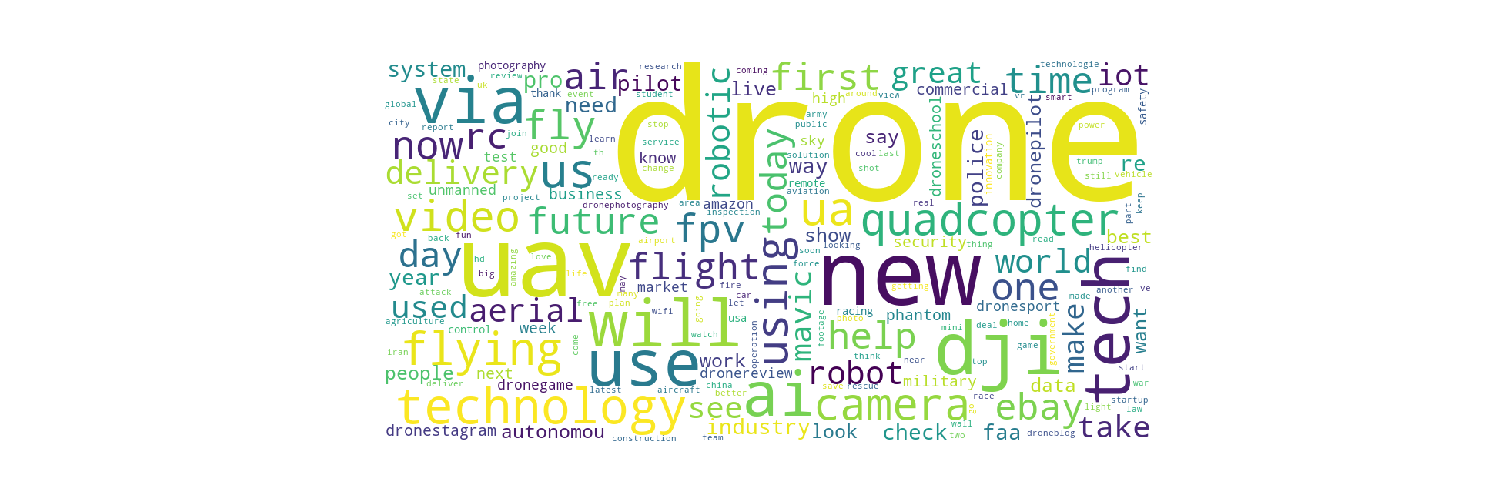

In [29]:
#top occuring words in tweets

getWordCloud(tweets_final.text[tweets_final.text!='nan'])

In [30]:
#thiss function will return top n words from a corpus, will be used later on
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

**What are the top words in the tweets and what are their counts??**

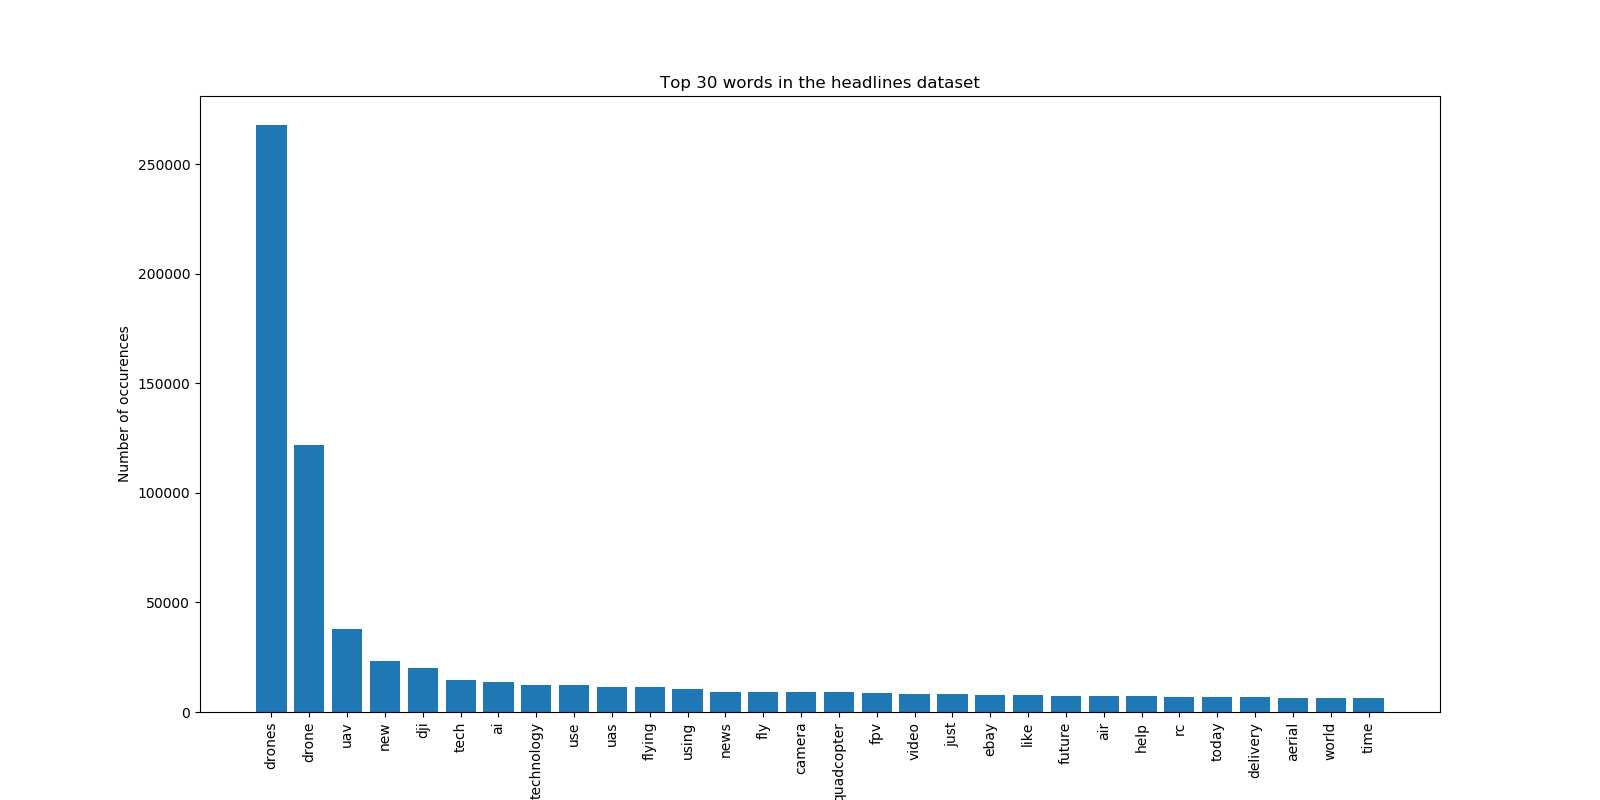

In [32]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final['text'],30):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 30 words in the headlines dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

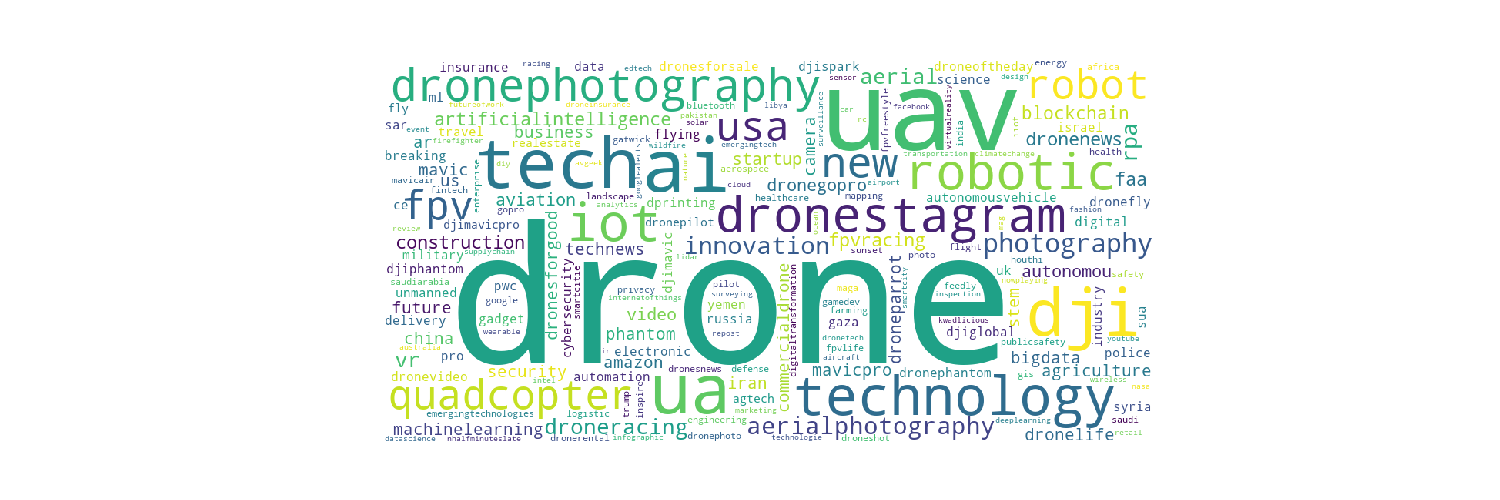

In [33]:
#Top occuring hashtags
tweets_final.hashtags = tweets_final.hashtags.astype('str')
getWordCloud(tweets_final.hashtags[tweets_final.hashtags!='nan'])

**What are the top hashtags in the tweets and what are their counts??**

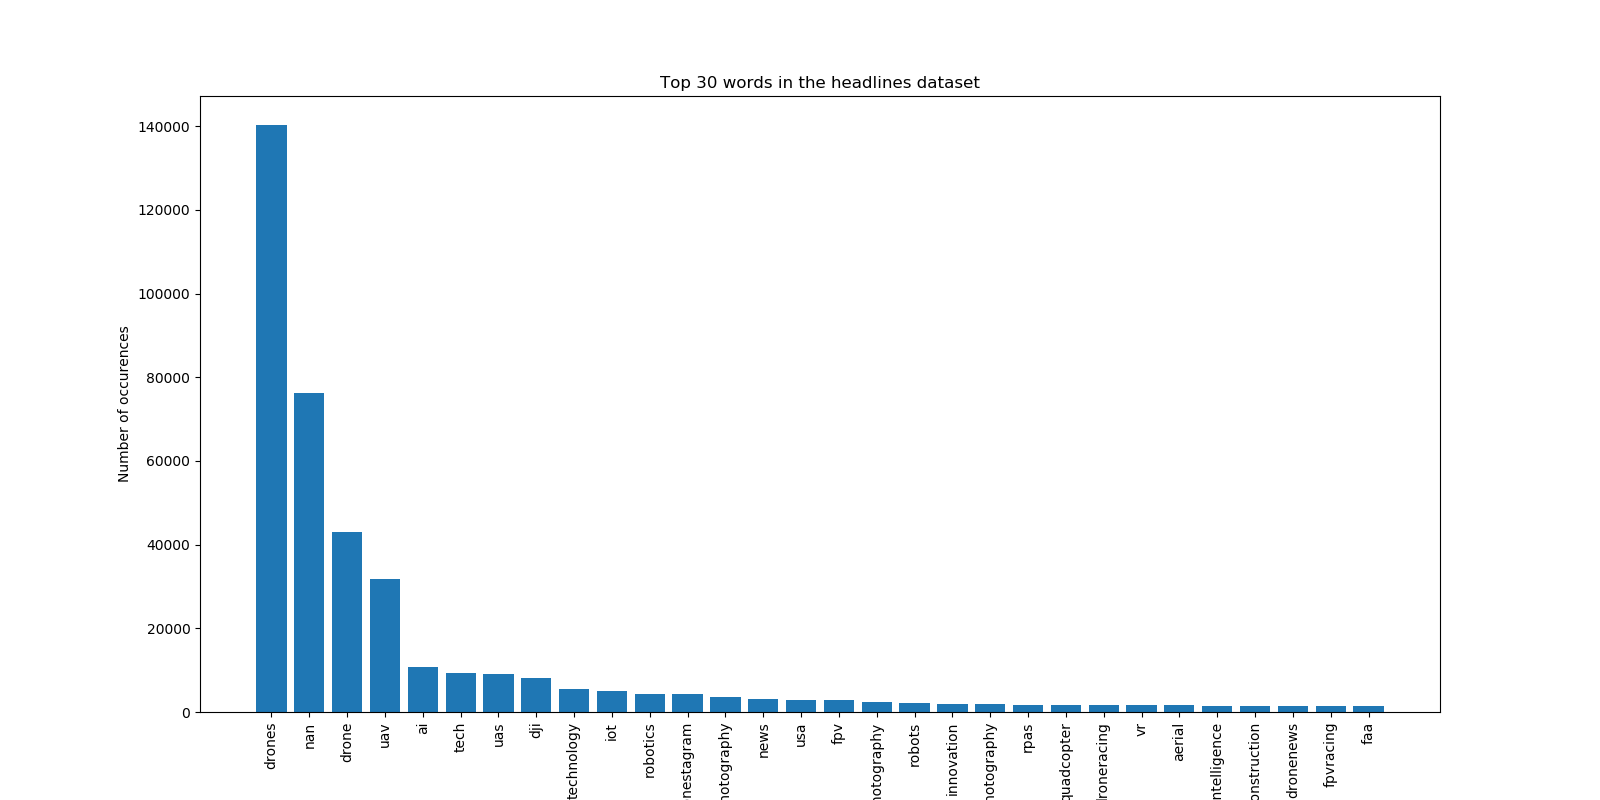

In [35]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final['hashtags'],30):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 30 words in the dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

**Let's print the LDA viz**

**input**: lda_model

**Let's do preprocessing and vizualize using Ldaviz**

In [37]:
#Import lda, do preprocessing of tweets and visualize

df1 = tweets_final.copy()
df1 = pd.DataFrame(df1['text'])

df1 = tweets_final.copy()
df1 = pd.DataFrame(df1['text'])

import pyLDAvis
import pyLDAvis.gensim
import gensim
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk; nltk.download('stopwords')

lda_model =  models.LdaModel.load('/dbfs/FileStore/tables/lda_pipeline_model.gensim')
#import libraries



#downloading spacy
!python -m spacy download en_core_web_sm
nltk.download('wordnet')


stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
  return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
  
#lemmatizes and removes stopwords
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
  
sum(df1['text'].isnull())
df1['text'] = df1['text'].dropna()

df1['text'] = df1['text'].astype('str')

processed_docs = df1['text'].map(preprocess)
dictionary = gensim.corpora.Dictionary(processed_docs)

wordtoid = dictionary.token2id

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(LDAvis_prepared)


In [38]:
#converting created at column into datetime object

tweets_final['created_at'] = pd.to_datetime(tweets_final['created_at'], format="%Y-%m")

**Now, we will ask the user to input the threshold year. The analysis will be after the threshold year**

In [40]:
dbutils.widgets.text("year", "enter start year")
year_threshold = dbutils.widgets.get("year")
print(year_threshold)

2016

In [41]:
#filtering dataframe using threshold year

year_threshold = int(year_threshold)
tweets_final = tweets_final[tweets_final.created_at.dt.year> year_threshold]

**Now, first we will start with yearly analysis and then move on to monthly analysis**

In [43]:
#topic0_name = 'Industry applications'
#topic1_name = 'Drone Accessories'
#topic2_name = 'Photography'
#topic3_name = 'Geo-political'
#topic4_name = 'AI and Future'

topics = ['Industry applications', 'Drone Accessories', 'Photography', 'Geo-political', 'AI and Future'  ]

In [44]:
#making a column to store year

tweets_final['year'] = pd.DatetimeIndex(tweets_final['created_at']).year
tweets_final['year'] = tweets_final['year'].astype('int')

In [45]:
tweets_final.head()

text 
 created_at 
 topic 
 topic_name 
 class0_prob 
 class1_prob 
 sentiment 
 hashtags 
 year 
 
 
 
 
 0 
 with law enforcement cracking down on our use ... 
 2020-01-16 23:57:08 
 2 
 Photography 
 0.155250 
 0.844750 
 1 
 drones 
 2020 
 
 
 1 
 we re researching ways to accelerate advanced ... 
 2020-01-16 23:56:22 
 0 
 Industry applications 
 0.037581 
 0.962419 
 1 
 nan 
 2020 
 
 
 2 
 rpas continua la vanguardia de la tecnolog par... 
 2020-01-16 23:53:15 
 4 
 AI and Future 
 0.267577 
 0.732423 
 1 
 rpas 
 2020 
 
 
 3 
 it bird it plane no it and delivering prescrip... 
 2020-01-16 23:51:01 
 4 
 AI and Future 
 0.585539 
 0.414461 
 0 
 drones 
 2020 
 
 
 4 
 drones and accessories visit our online store ... 
 2020-01-16 23:46:15 
 1 
 Drone Accessories 
 0.144054 
 0.855946 
 1 
 drones 
 2020

In [46]:
#grabbing total topics from the data
total_topics = tweets_final['topic'].nunique()

In [47]:
tweets_final.head()


text 
 created_at 
 topic 
 topic_name 
 class0_prob 
 class1_prob 
 sentiment 
 hashtags 
 year 
 
 
 
 
 0 
 with law enforcement cracking down on our use ... 
 2020-01-16 23:57:08 
 2 
 Photography 
 0.155250 
 0.844750 
 1 
 drones 
 2020 
 
 
 1 
 we re researching ways to accelerate advanced ... 
 2020-01-16 23:56:22 
 0 
 Industry applications 
 0.037581 
 0.962419 
 1 
 nan 
 2020 
 
 
 2 
 rpas continua la vanguardia de la tecnolog par... 
 2020-01-16 23:53:15 
 4 
 AI and Future 
 0.267577 
 0.732423 
 1 
 rpas 
 2020 
 
 
 3 
 it bird it plane no it and delivering prescrip... 
 2020-01-16 23:51:01 
 4 
 AI and Future 
 0.585539 
 0.414461 
 0 
 drones 
 2020 
 
 
 4 
 drones and accessories visit our online store ... 
 2020-01-16 23:46:15 
 1 
 Drone Accessories 
 0.144054 
 0.855946 
 1 
 drones 
 2020

**Yearly Analysis**

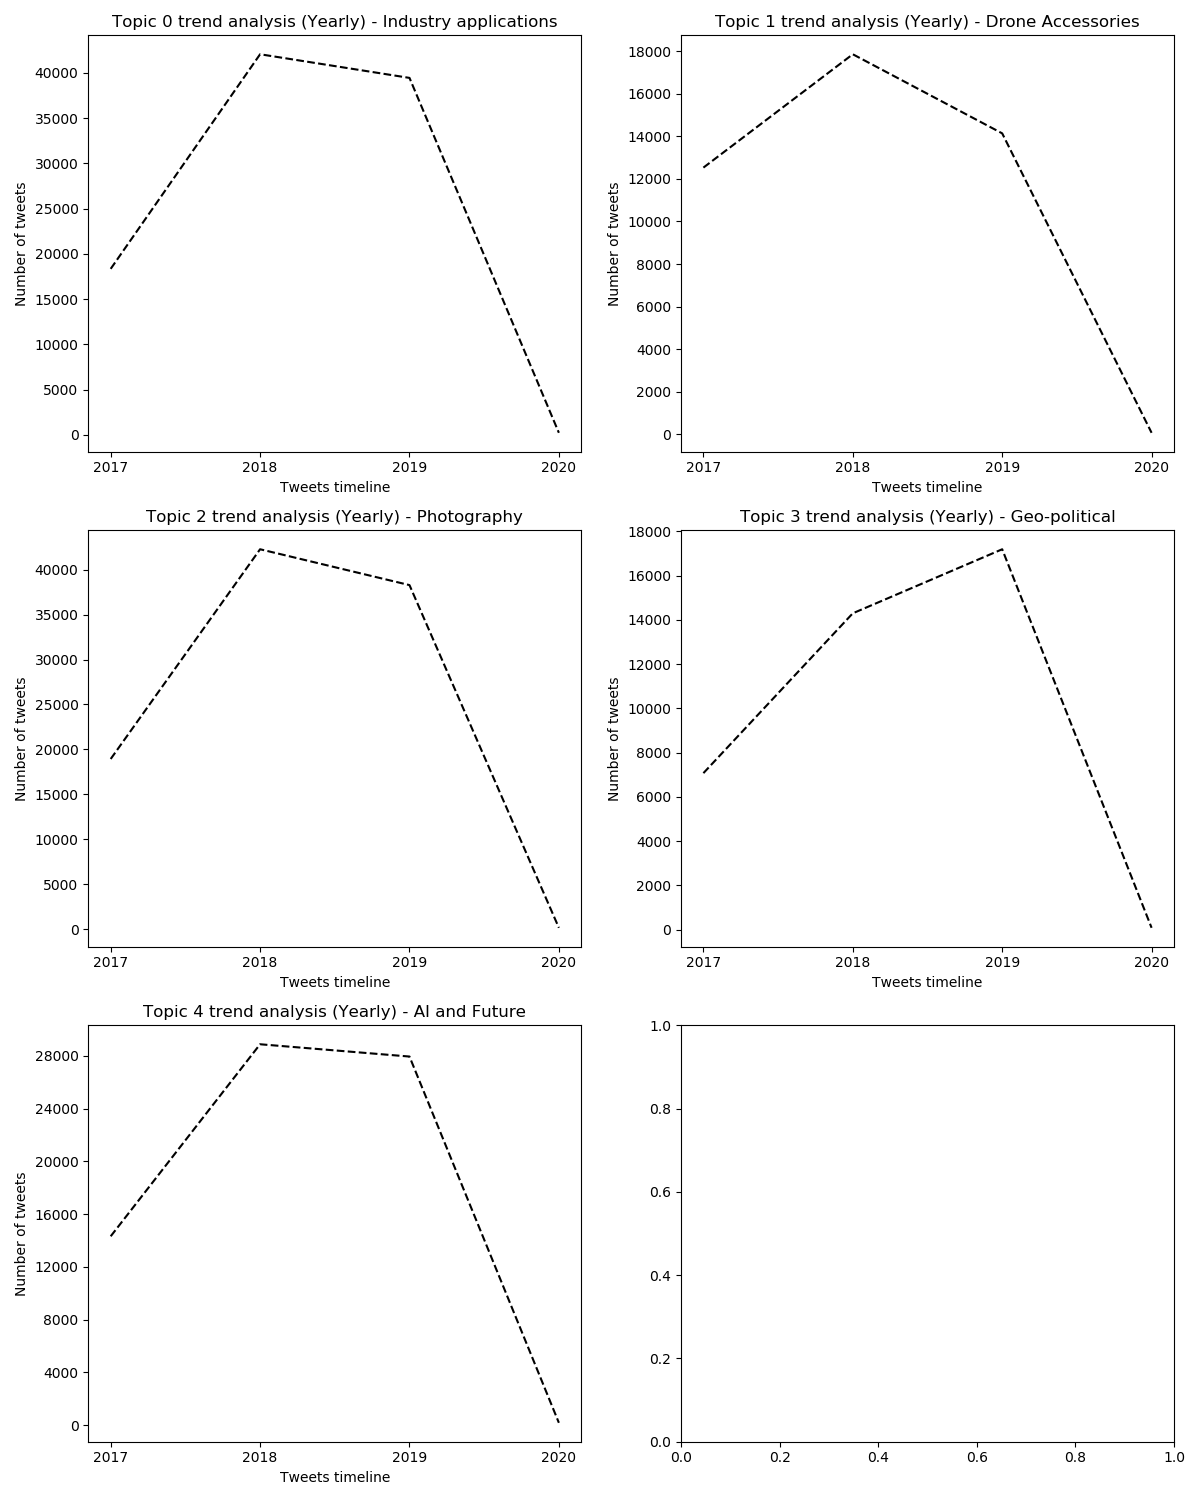

In [49]:
#topic_viz will be a new dataframe with number of tweets values ( for each topicv) grouped by years

topic_viz = pd.DataFrame(tweets_final[tweets_final['topic']==0].groupby(['year']).topic.count()).reset_index(drop = False)
topic_viz.columns = ['created_at', 'topic0']

for i in range(1,total_topics):
  
  topic_viz['topic'+str(i)] = pd.DataFrame(tweets_final[tweets_final['topic']==i].groupby(['year']).topic.count()).reset_index(drop = False)['topic']
  
topic_cols = list(topic_viz.columns)[1:]


from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

for variable, subplot in zip(topic_cols, ax.flatten()):


      subplot.plot(topic_viz['created_at'], topic_viz[variable], 'k--')
      subplot.set_title('Topic {} trend analysis (Yearly) - {}'.format(variable[-1], topics[int(variable[-1])]))
      subplot.set_ylabel('Number of tweets')
      subplot.set_xlabel('Tweets timeline')
      subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
      subplot.xaxis.set_major_locator(MaxNLocator(integer=True))
      for label in subplot.get_xticklabels(int):
        label.set_rotation(90)

plt.tight_layout()

display(fig)  

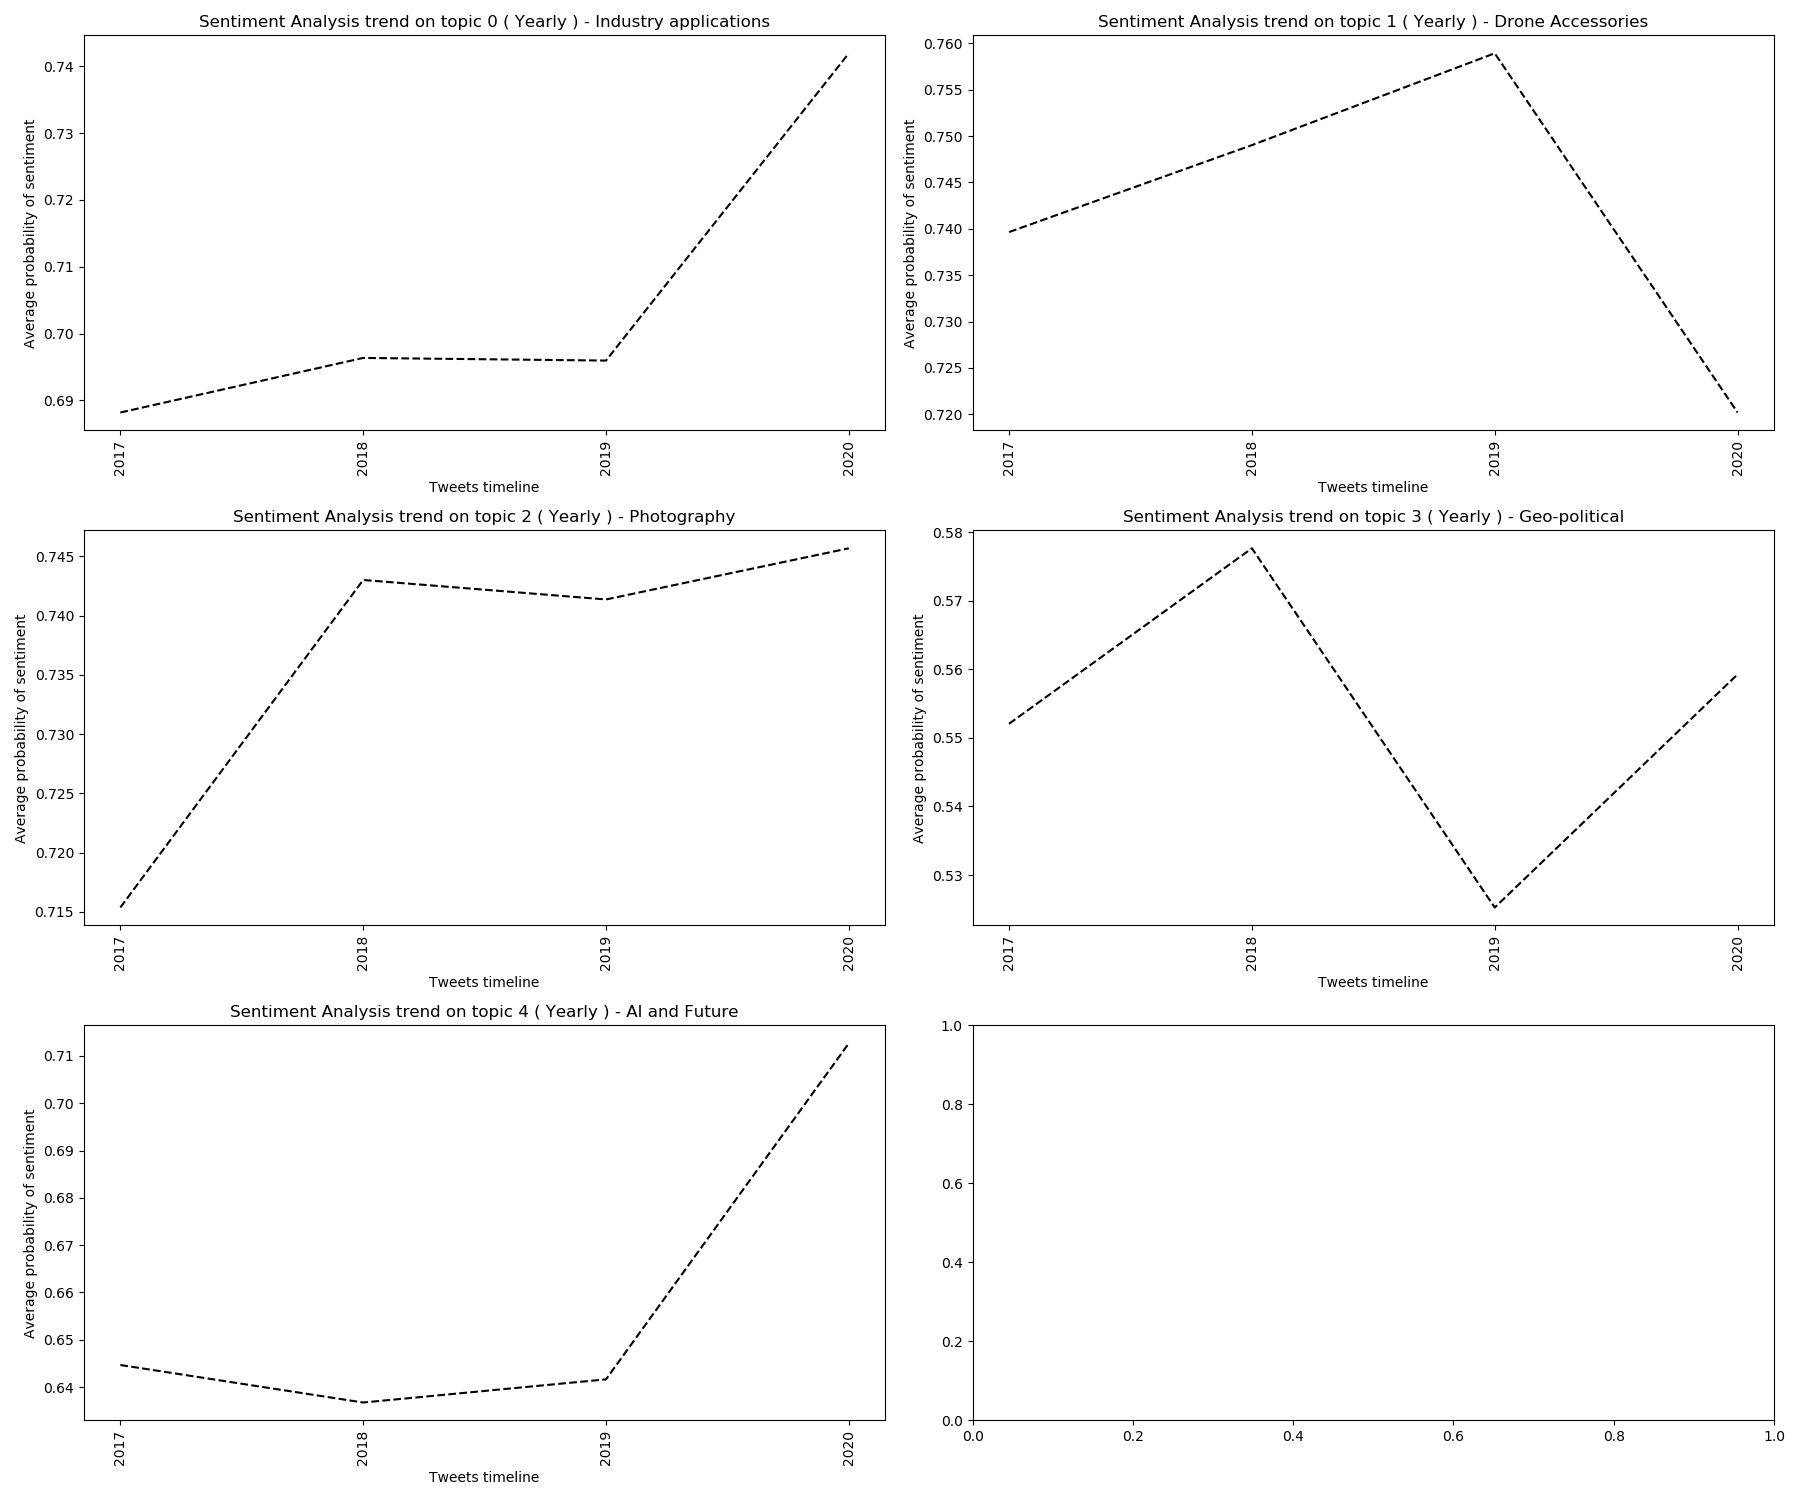

In [50]:
#topic sentiment contains average probability of positive sentiment grouped by year

topic_sentiment = pd.DataFrame(tweets_final[tweets_final['topic']==0].groupby(['year']).class1_prob.mean()).reset_index(drop = False)
topic_sentiment.columns = ['created_at', 'topic0']

for i in range(1,total_topics):
  
  topic_sentiment['topic'+str(i)] = pd.DataFrame(tweets_final[tweets_final['topic']==i].groupby(['year']).class1_prob.mean()).reset_index(drop = False)['class1_prob']
  
topic_wise_sentiment_columns = list(topic_viz.columns)[1:]

from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
import numpy as np

for variable, subplot in zip(topic_wise_sentiment_columns, ax.flatten()):
      subplot.plot(topic_sentiment['created_at'], topic_sentiment[variable], 'k--')
      subplot.xaxis.set_major_locator(MaxNLocator(integer=True))
      subplot.set_title('Sentiment Analysis trend on topic {} ( Yearly ) - {}'.format(variable[-1],  topics[int(variable[-1])]))
      subplot.set_ylabel('Average probability of sentiment')
      subplot.set_xlabel('Tweets timeline')
      #subplot.set_yticklabels(np.round(np.linspace(0,1,10), 2))
      for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()

display(fig)     

**Now, lets break it into monthly analysis**

In [52]:
#changing created_by column into year-month column

tweets_final.created_at = pd.to_datetime(tweets_final.created_at).dt.strftime('%m/%Y')

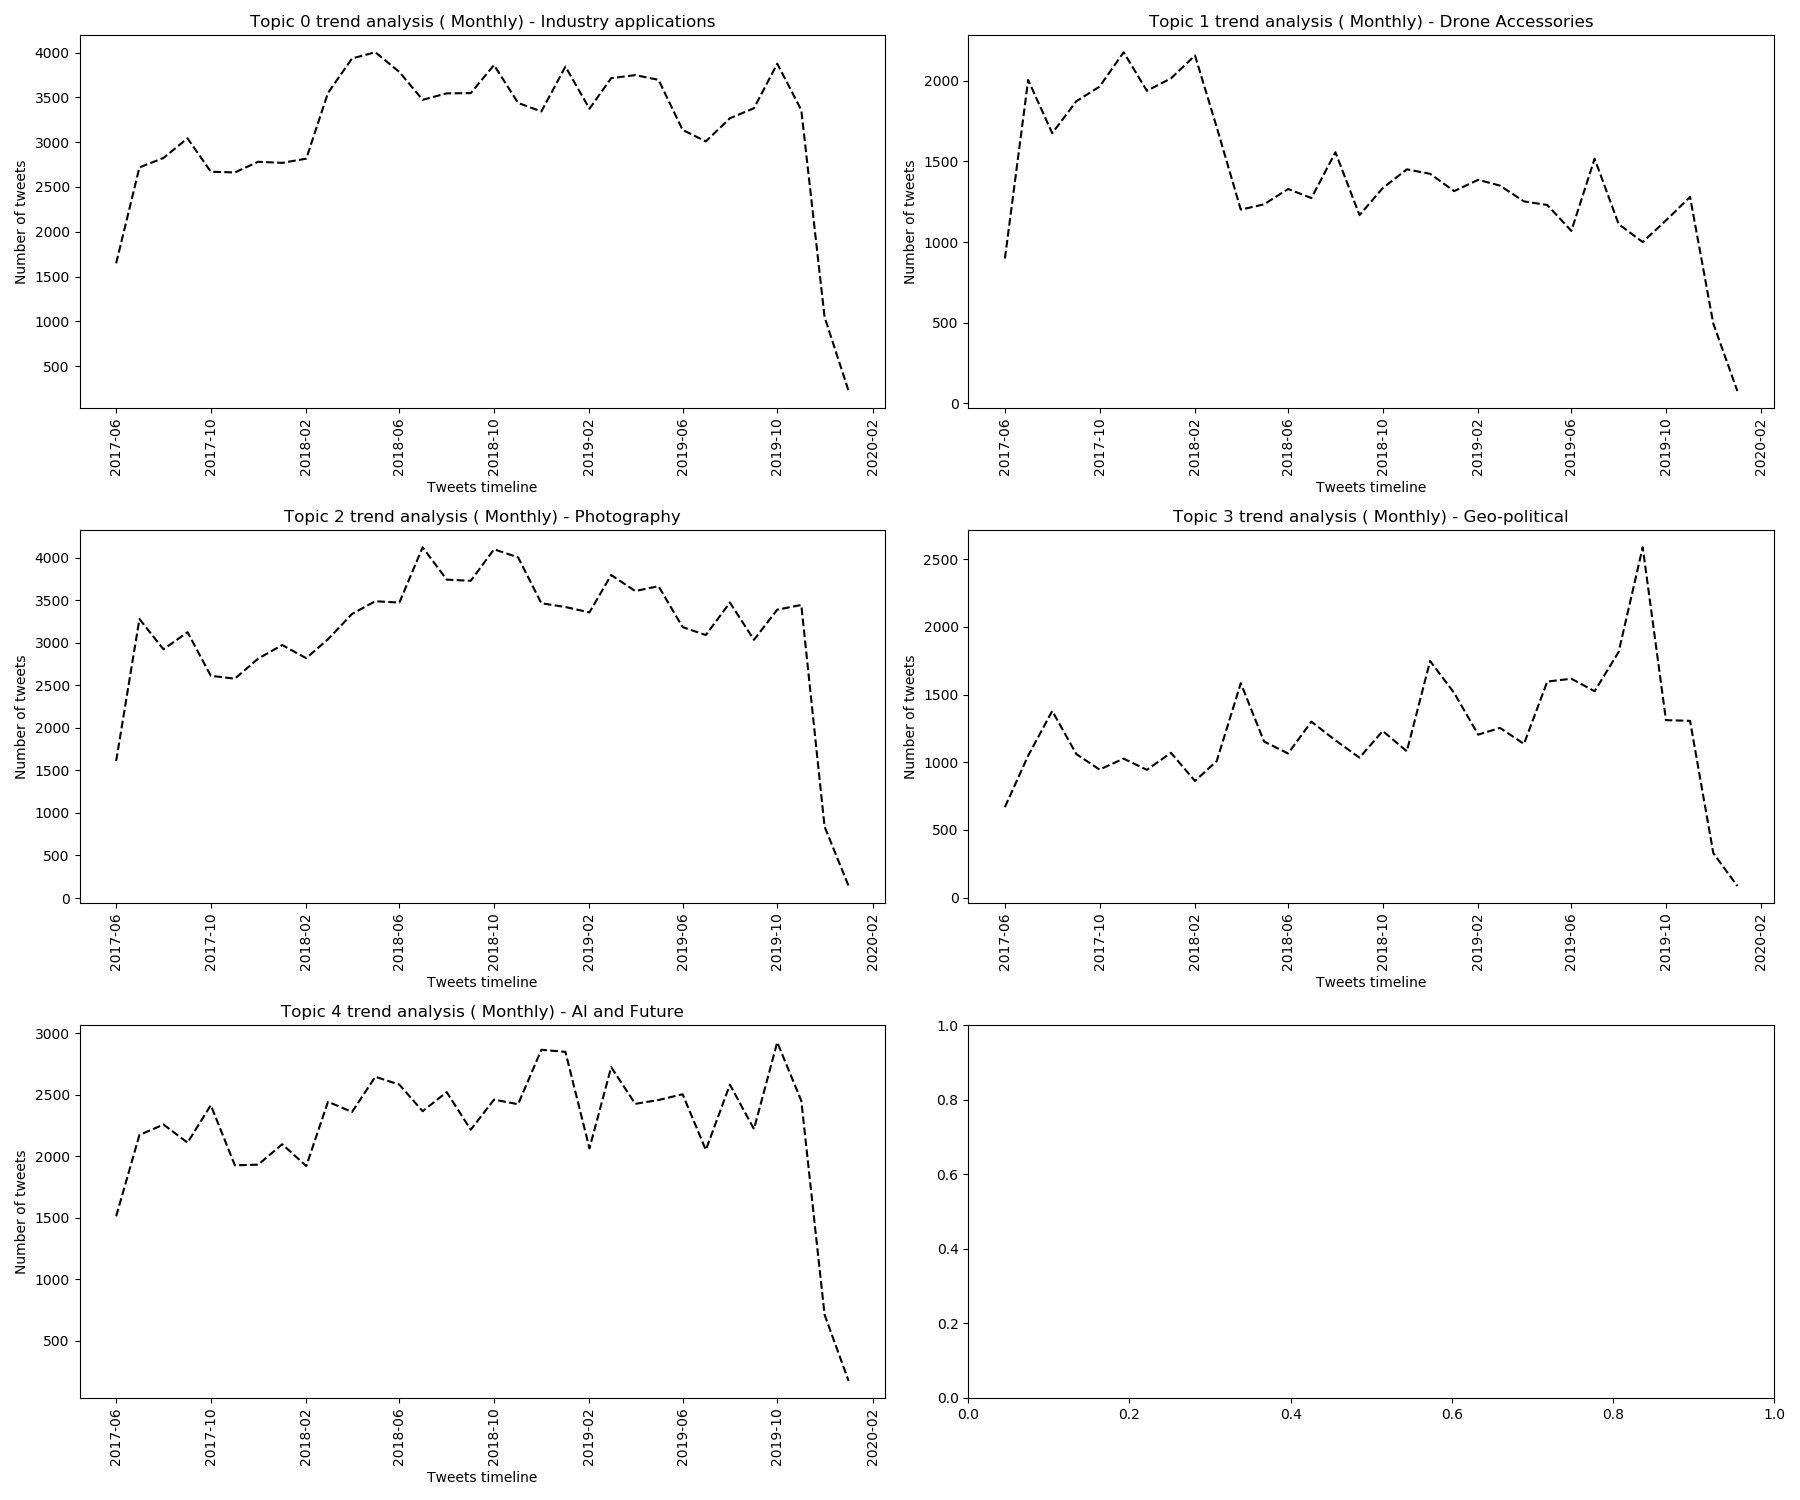

In [53]:
#topic analysis monthly

topic_viz = pd.DataFrame(tweets_final[tweets_final['topic']==0].groupby(['created_at']).topic.count()).reset_index(drop = False)
topic_viz.columns = ['created_at', 'topic0']
topic_viz['created_at'] = pd.to_datetime(topic_viz['created_at'], infer_datetime_format = True)
topic_viz = topic_viz.sort_values(by = 'created_at')

for i in range(1,total_topics):
  
  next_topic_df = pd.DataFrame(tweets_final[tweets_final['topic']==i].groupby(['created_at']).topic.count()).reset_index(drop = False)
  next_topic_df['created_at'] = pd.to_datetime(next_topic_df['created_at'], infer_datetime_format = True)
  next_topic_df = next_topic_df.sort_values(by = 'created_at')
  
  
  topic_viz['topic'+str(i)] = next_topic_df['topic']
  
topic_cols = list(topic_viz.columns)[1:]


fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for variable, subplot in zip(topic_cols, ax.flatten()):
      subplot.plot(topic_viz['created_at'], topic_viz[variable], 'k--')
      subplot.set_title('Topic {} trend analysis ( Monthly) - {}'.format(variable[-1],  topics[int(variable[-1])]))
      subplot.set_ylabel('Number of tweets')
      subplot.set_xlabel('Tweets timeline')
      for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()

display(fig)     

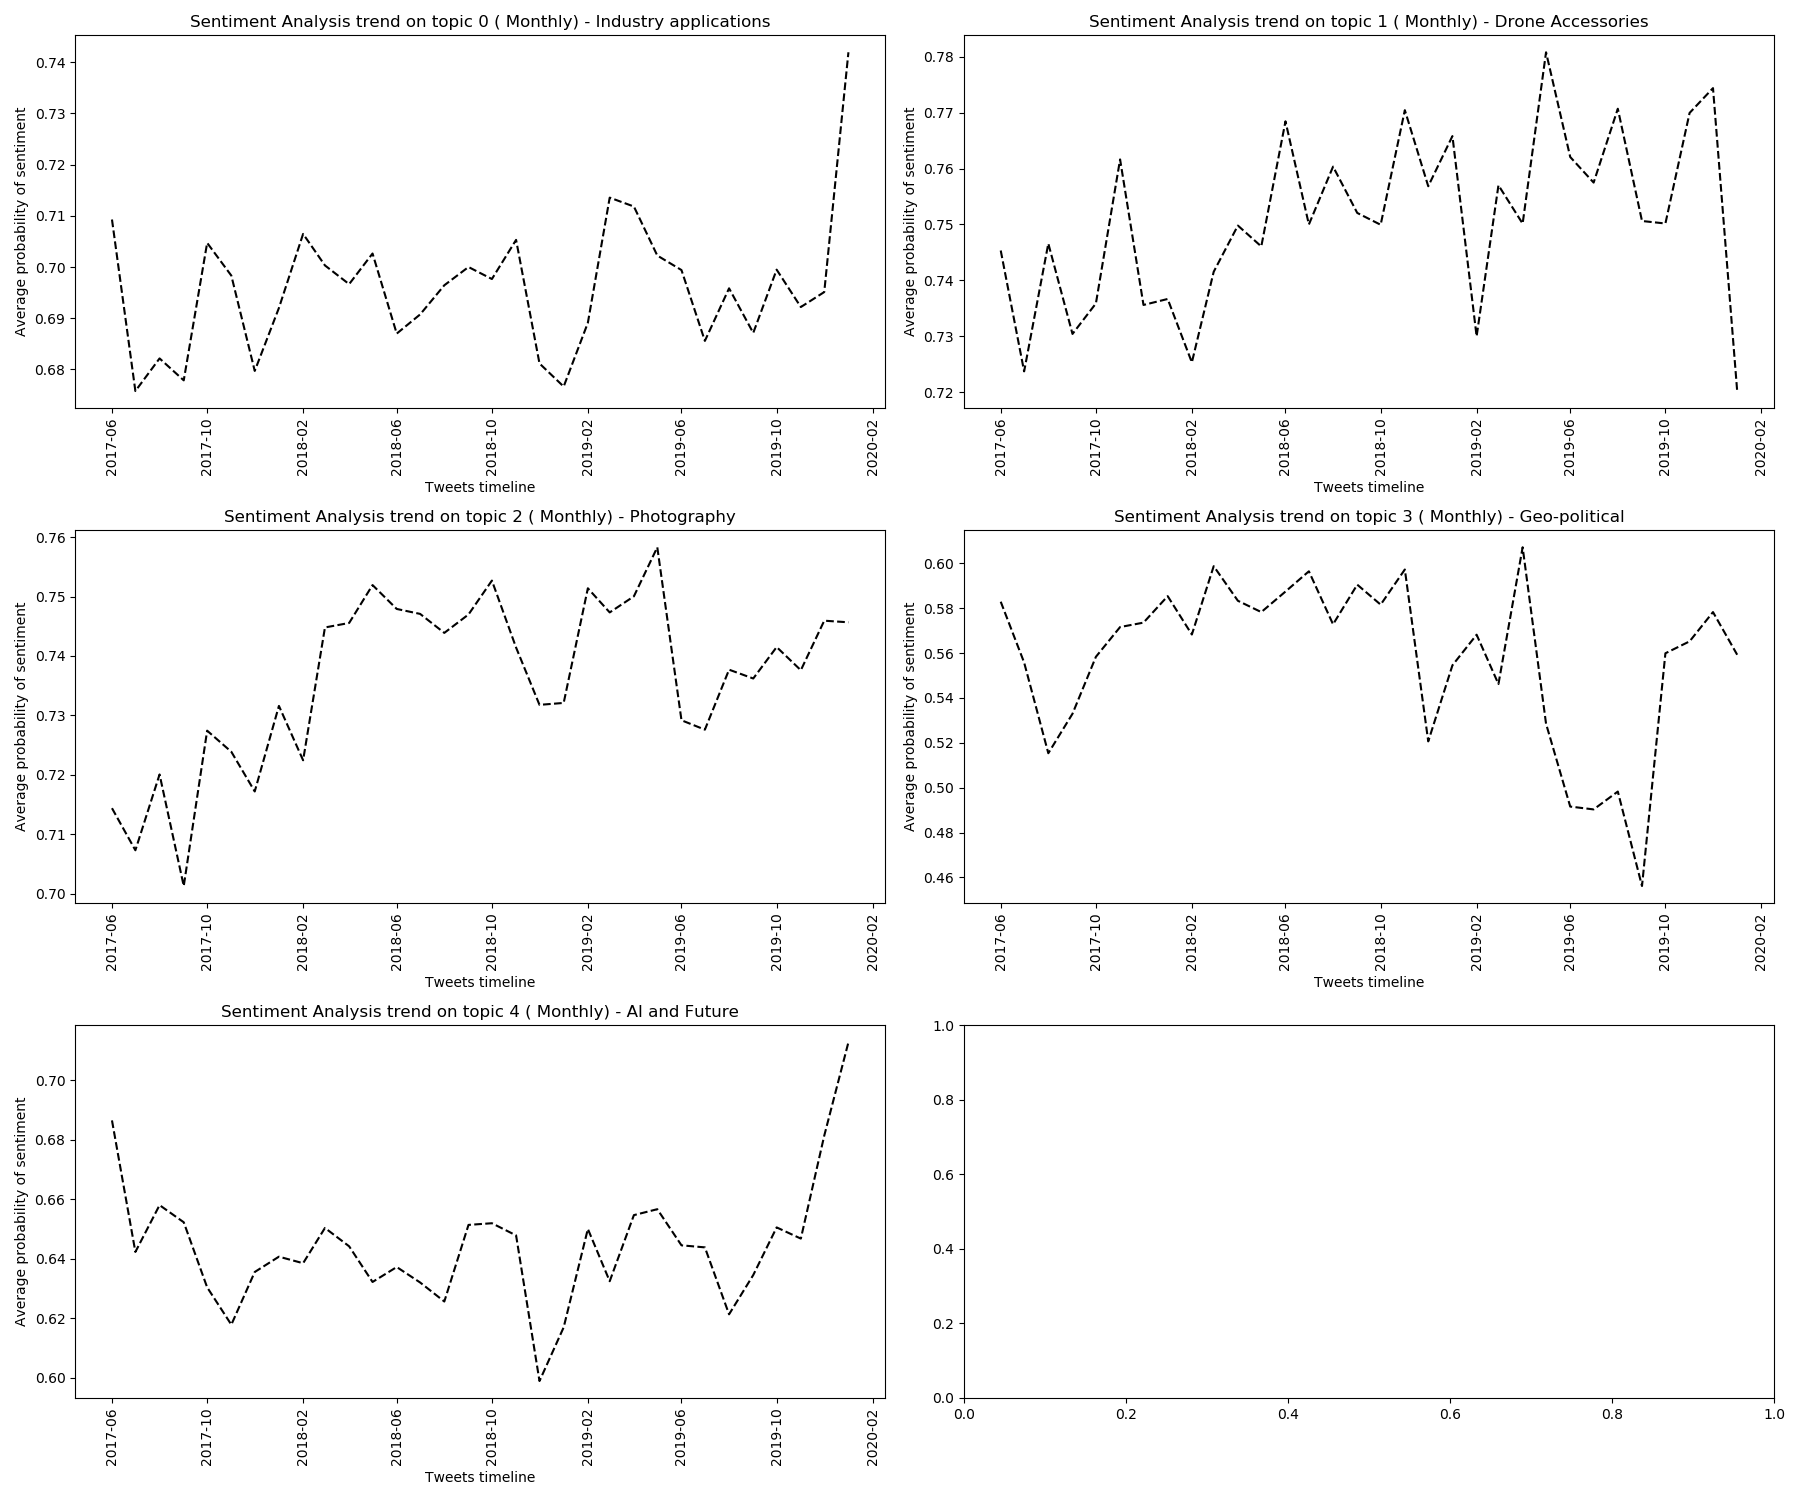

In [54]:
#sentiment analysis monthly

topic_sentiment = pd.DataFrame(tweets_final[tweets_final['topic']==0].groupby(['created_at']).class1_prob.mean()).reset_index(drop = False)
topic_sentiment.columns = ['created_at', 'topic0']
topic_sentiment['created_at'] = pd.to_datetime(topic_sentiment['created_at'], infer_datetime_format = True)
topic_sentiment = topic_sentiment.sort_values(by = 'created_at')

for i in range(1,total_topics):
  
  next_topic_df = pd.DataFrame(tweets_final[tweets_final['topic']==i].groupby(['created_at']).class1_prob.mean()).reset_index(drop = False)
  next_topic_df['created_at'] = pd.to_datetime(next_topic_df['created_at'], infer_datetime_format = True)
  next_topic_df = next_topic_df.sort_values(by = 'created_at')
  
  topic_sentiment['topic'+str(i)] = next_topic_df['class1_prob']
  
topic_wise_sentiment_columns = list(topic_viz.columns)[1:]

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for variable, subplot in zip(topic_wise_sentiment_columns, ax.flatten()):
      subplot.plot(topic_sentiment['created_at'], topic_sentiment[variable], 'k--')
      subplot.set_title('Sentiment Analysis trend on topic {} ( Monthly) - {}'.format(variable[-1],  topics[int(variable[-1])]))
      subplot.set_ylabel('Average probability of sentiment')
      subplot.set_xlabel('Tweets timeline')
      for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()

display(fig)     

**What are the top words in extreme positive tweets?**

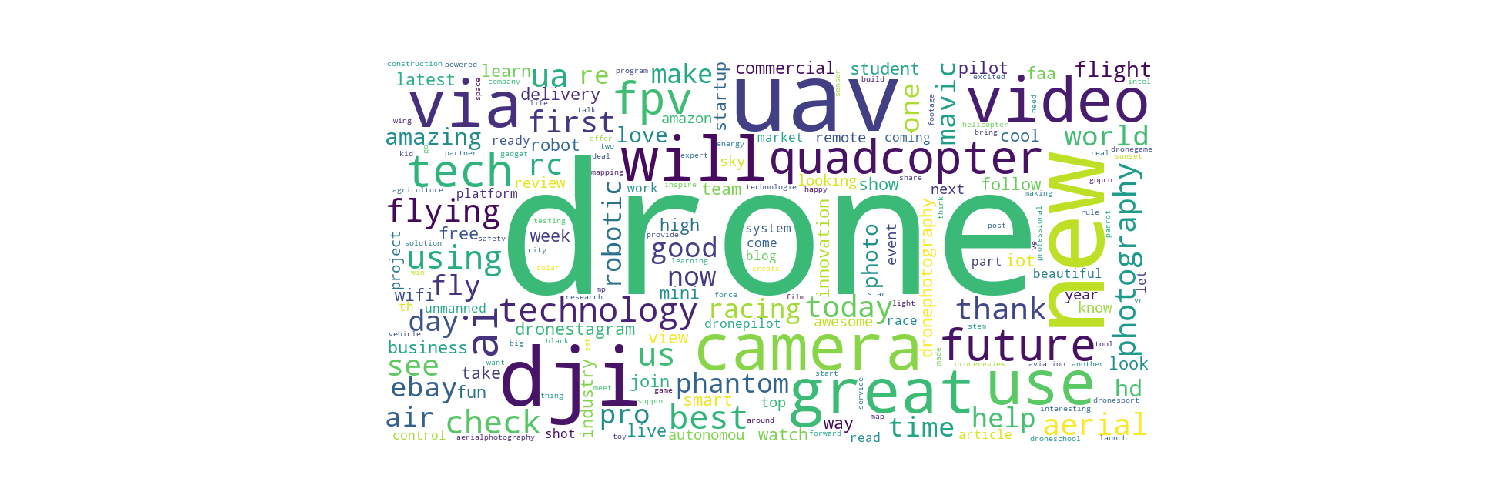

In [56]:
getWordCloud(tweets_final[tweets_final['class1_prob']>=0.9].text)

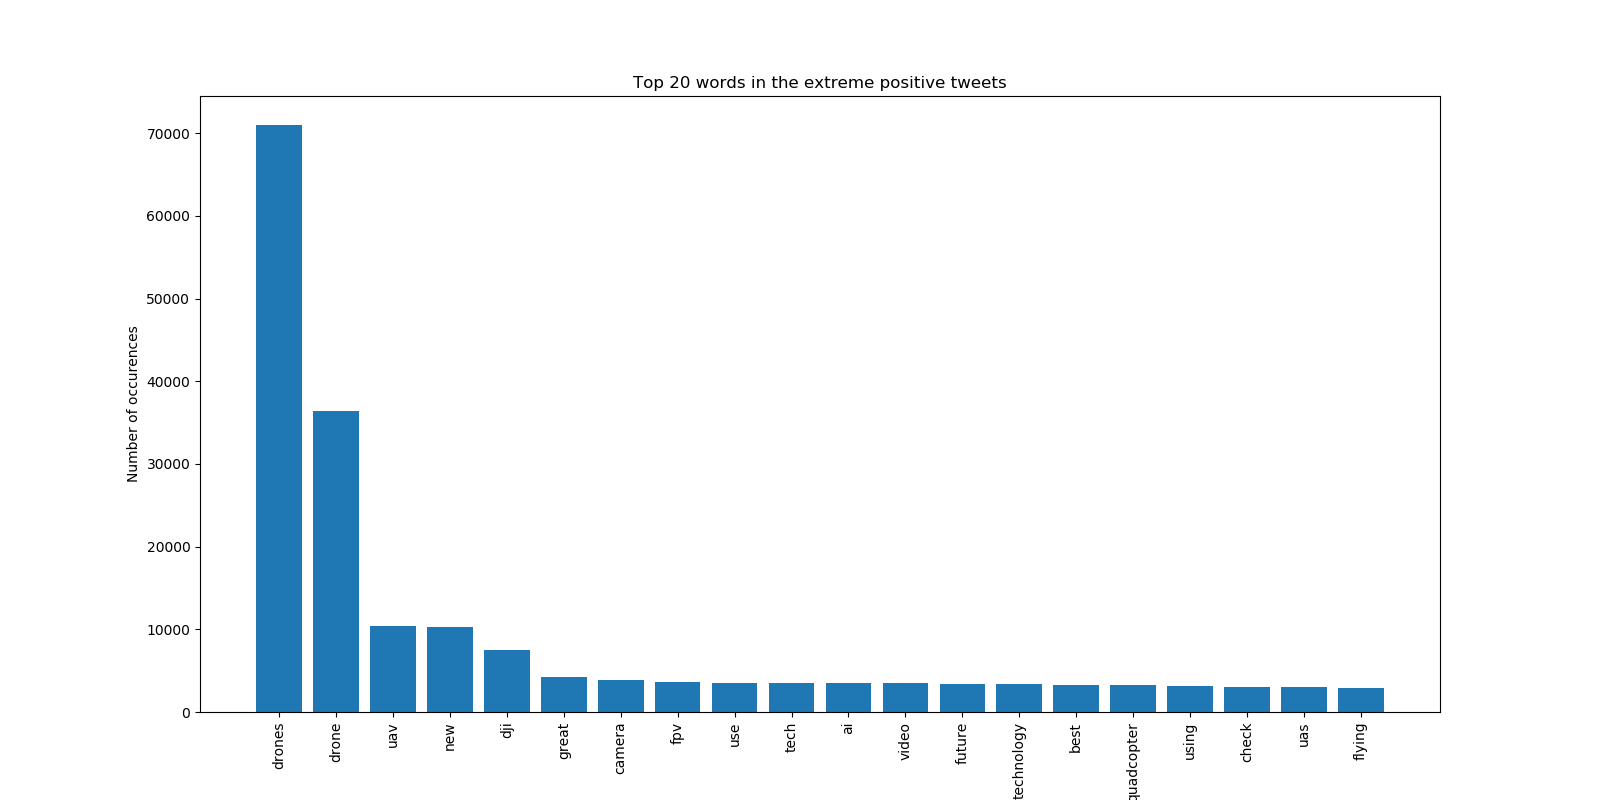

In [57]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final[tweets_final['class1_prob']>=0.9].text,20):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 20 words in the extreme positive tweets');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

**What are the top hashtags in extreme positive tweets?**

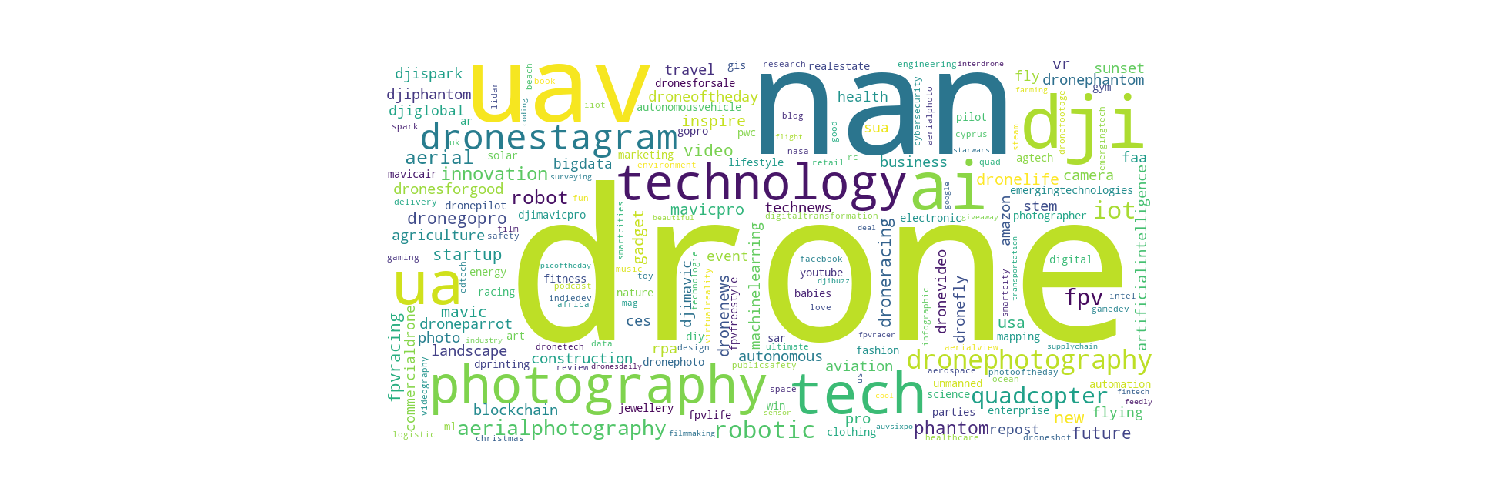

In [59]:
getWordCloud(tweets_final[tweets_final['class1_prob']>=0.9].hashtags)

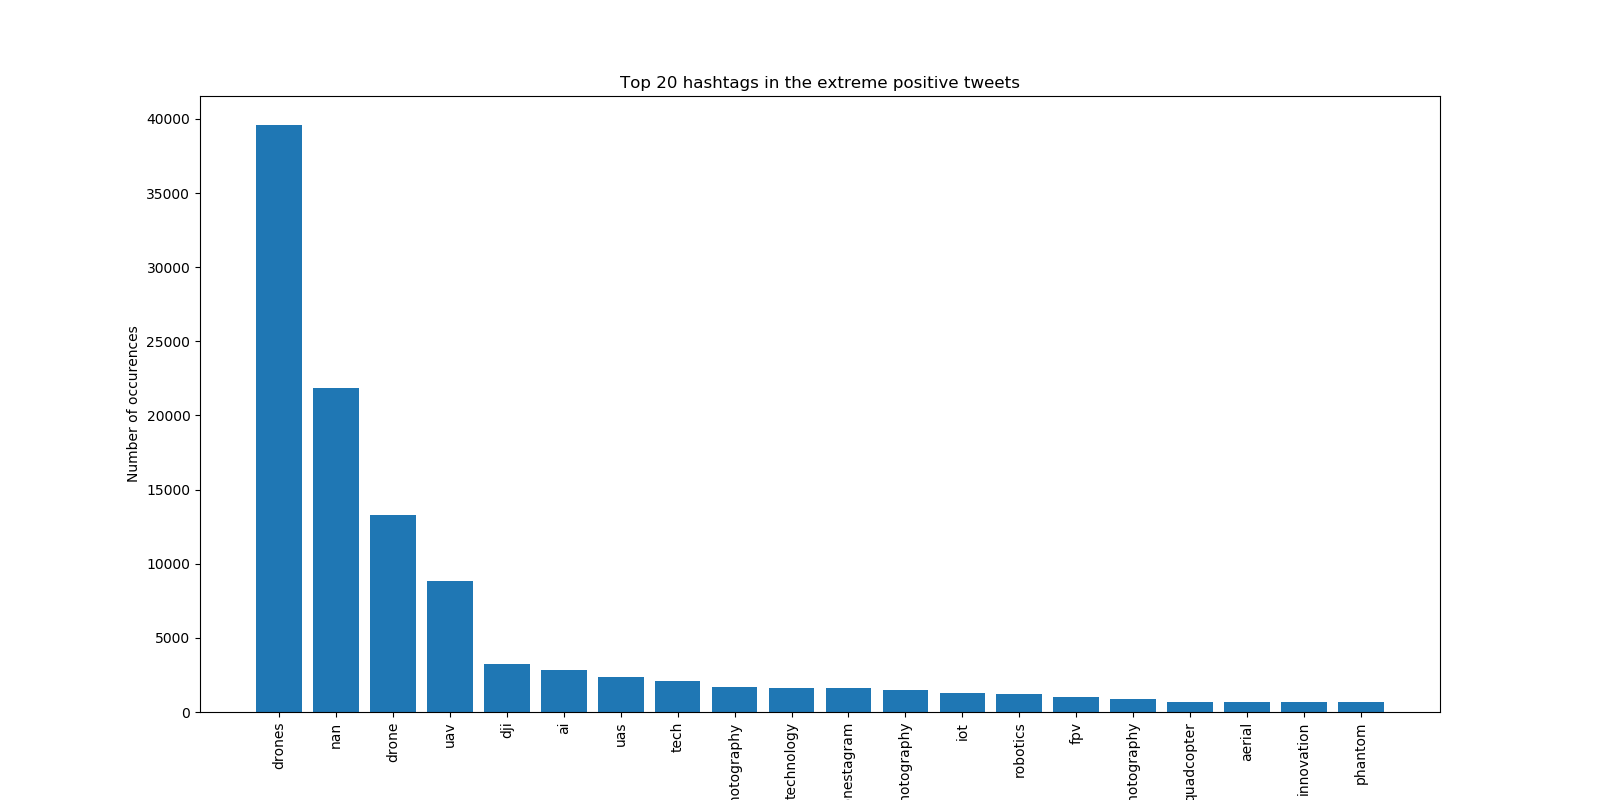

In [60]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final[tweets_final['class1_prob']>=0.9].hashtags,20):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 20 hashtags in the extreme positive tweets');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

**What are the top words in extreme negative tweets?**

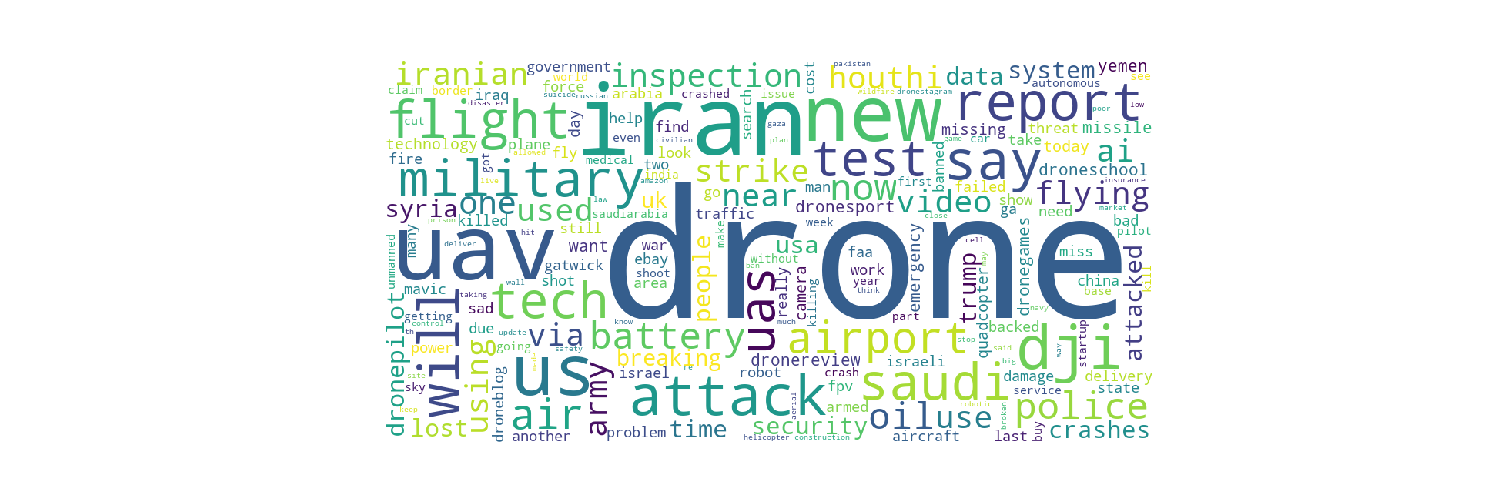

In [62]:
getWordCloud(tweets_final[tweets_final['class1_prob']<=0.1].text)

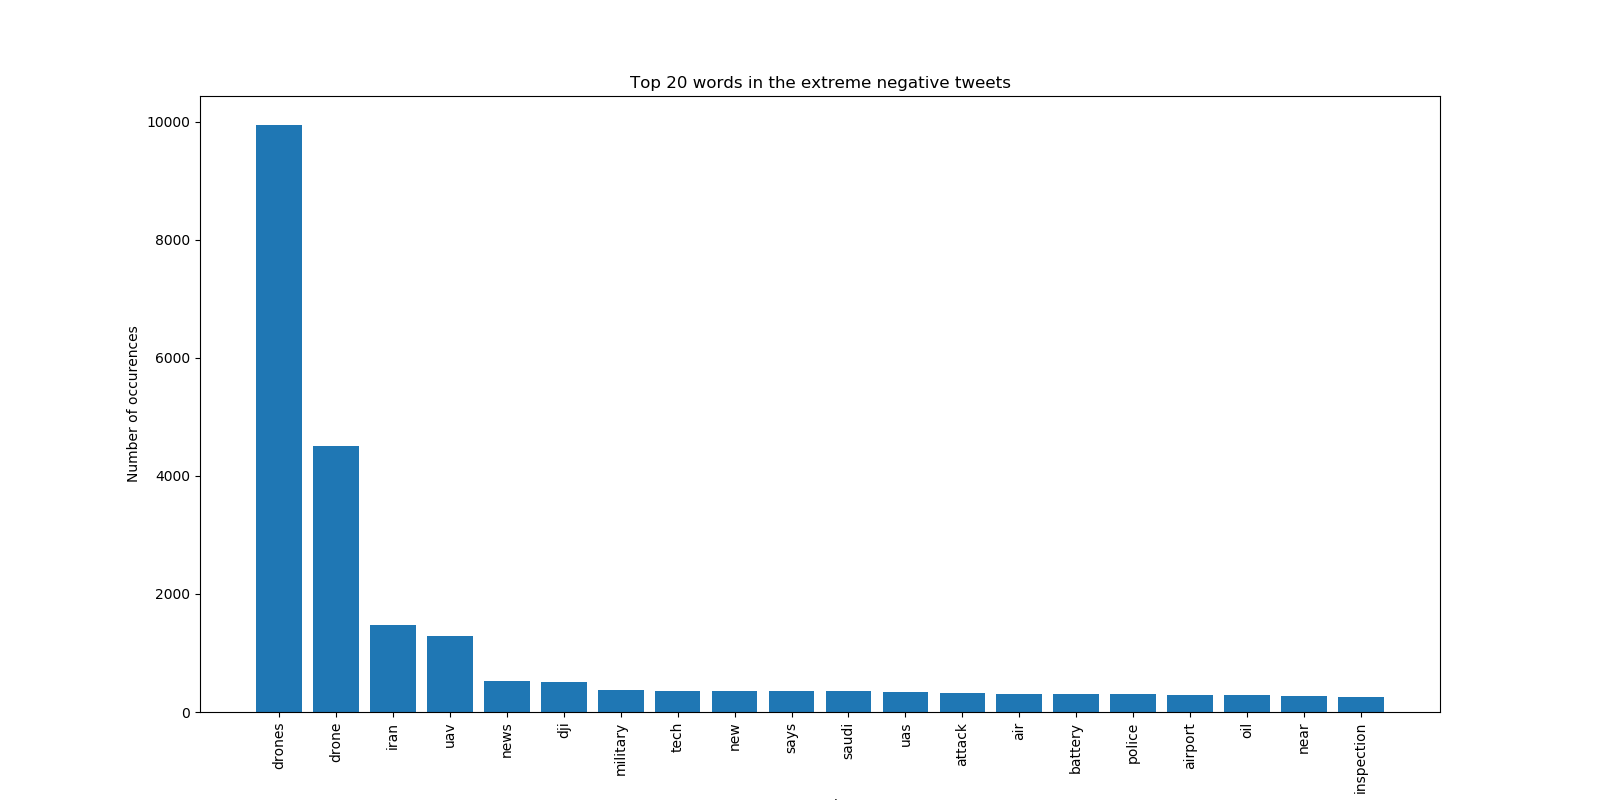

In [63]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final[tweets_final['class1_prob']<=0.1].text,20):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 20 words in the extreme negative tweets');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

**What are the top hashtags in extreme negative tweets?**

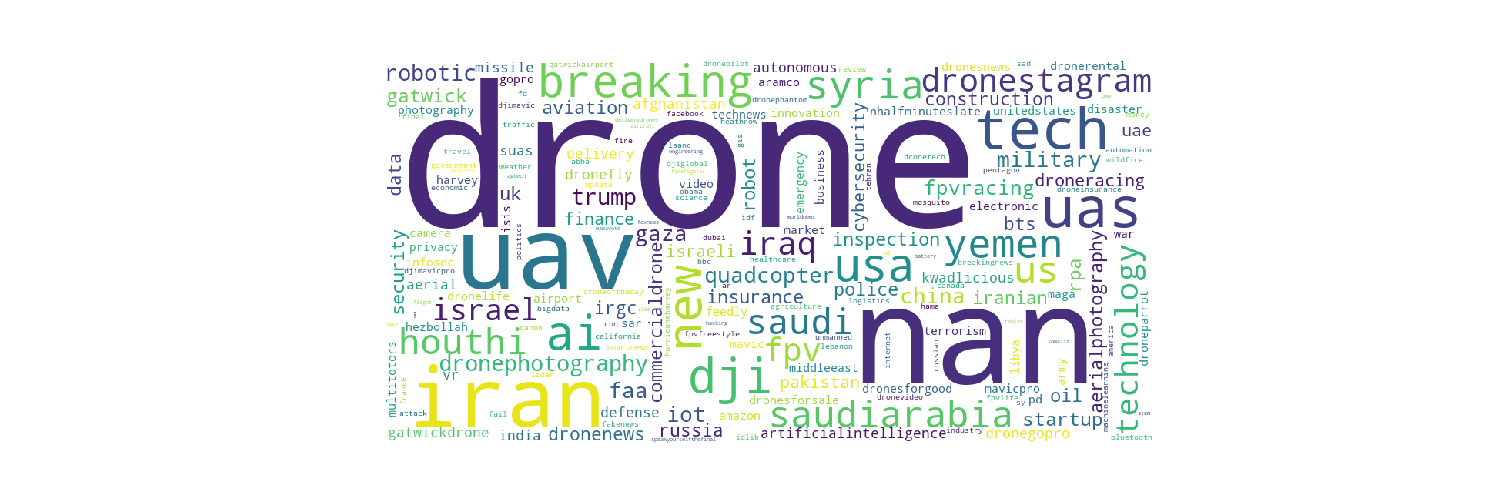

In [65]:
getWordCloud(tweets_final[tweets_final['class1_prob']<=0.1].hashtags)

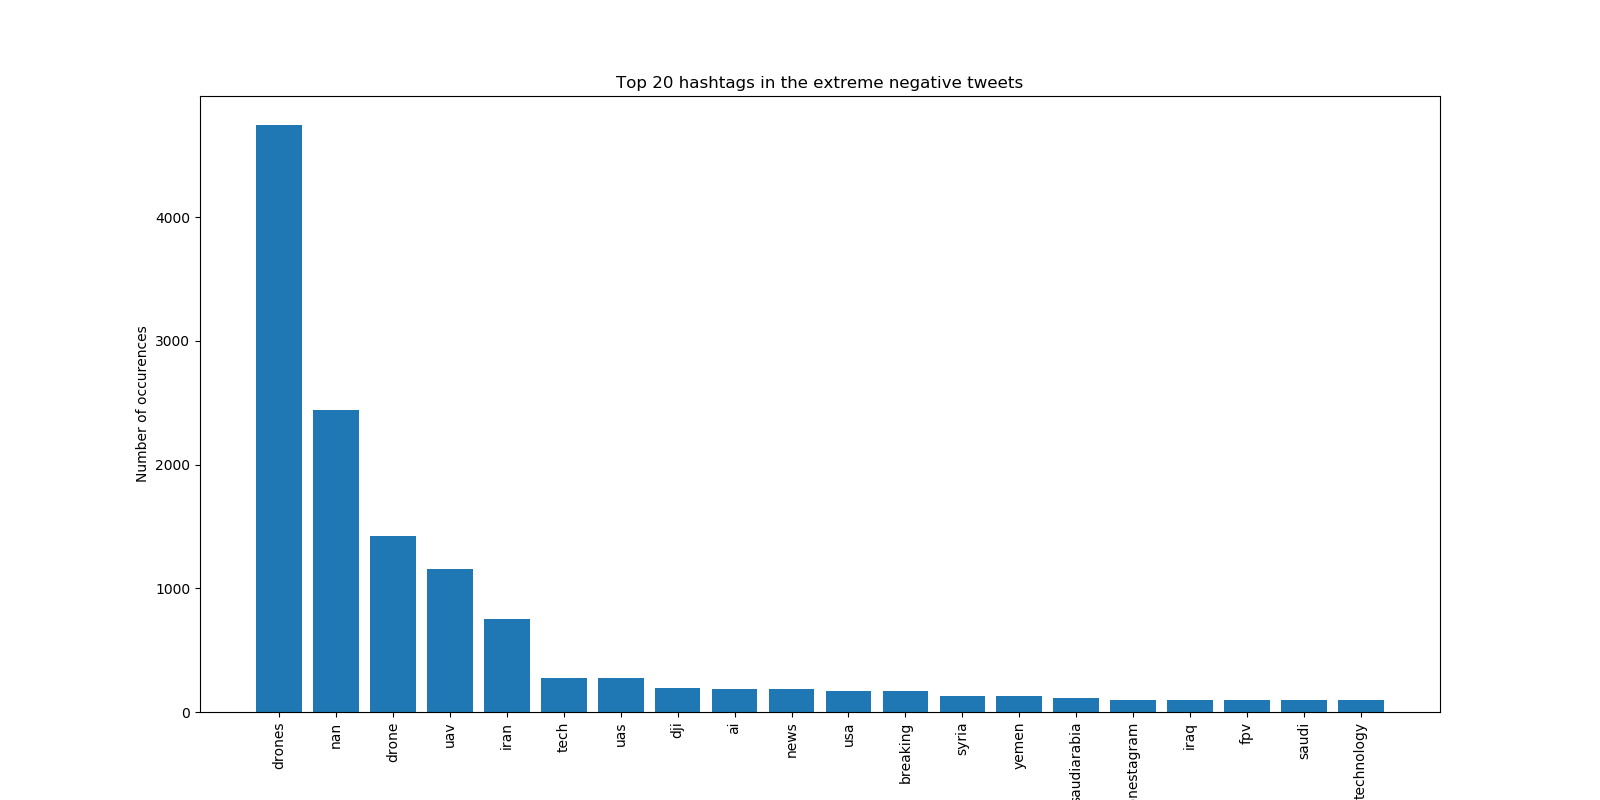

In [66]:
words = []
word_values = []
for i,j in get_top_n_words(tweets_final[tweets_final['class1_prob']<=0.1].hashtags,20):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 20 hashtags in the extreme negative tweets');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()
display()

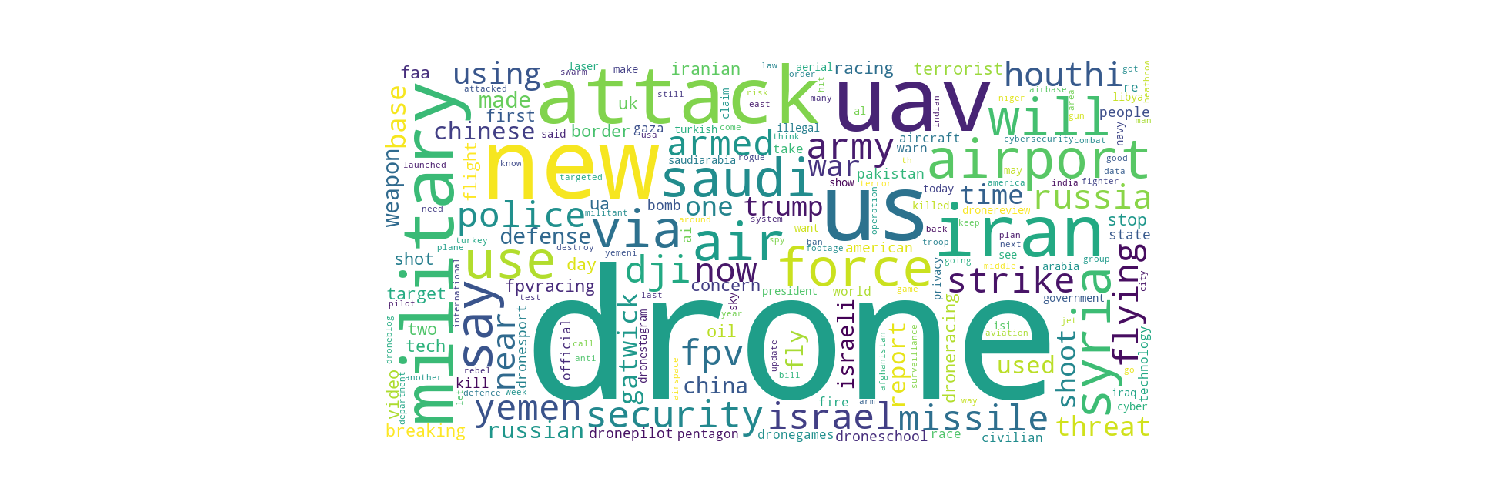

In [67]:
getWordCloud(tweets_final[tweets_final['topic']==3]['text'])

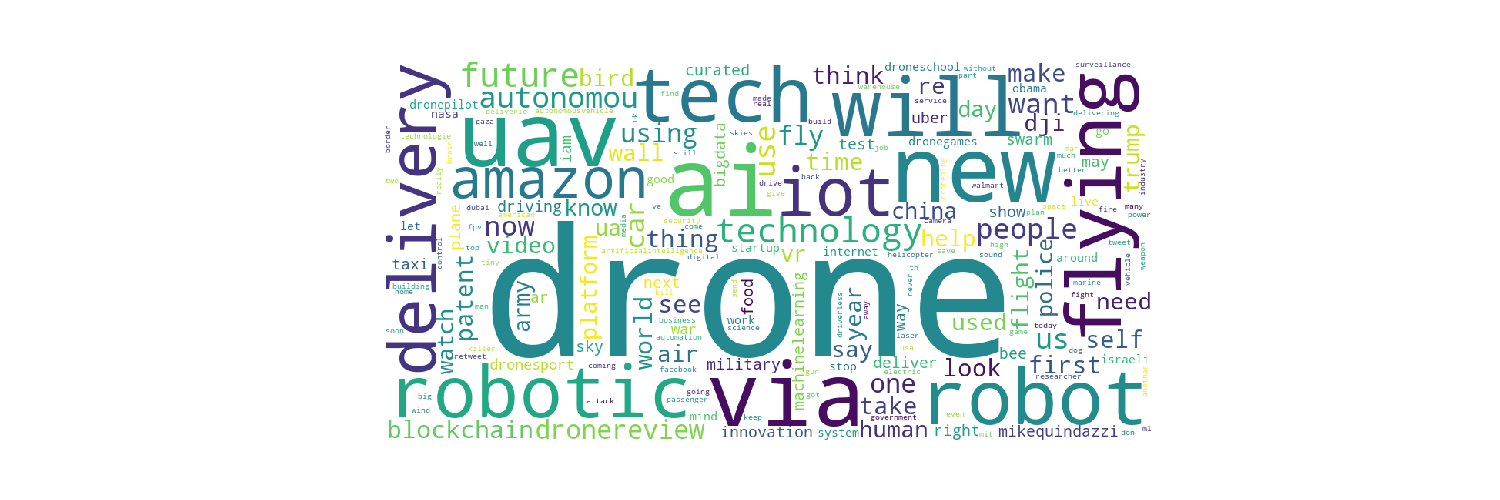

In [68]:
getWordCloud(tweets_final[tweets_final['topic']==4]['text'])

**chose threshhold to see the negative/positive words**

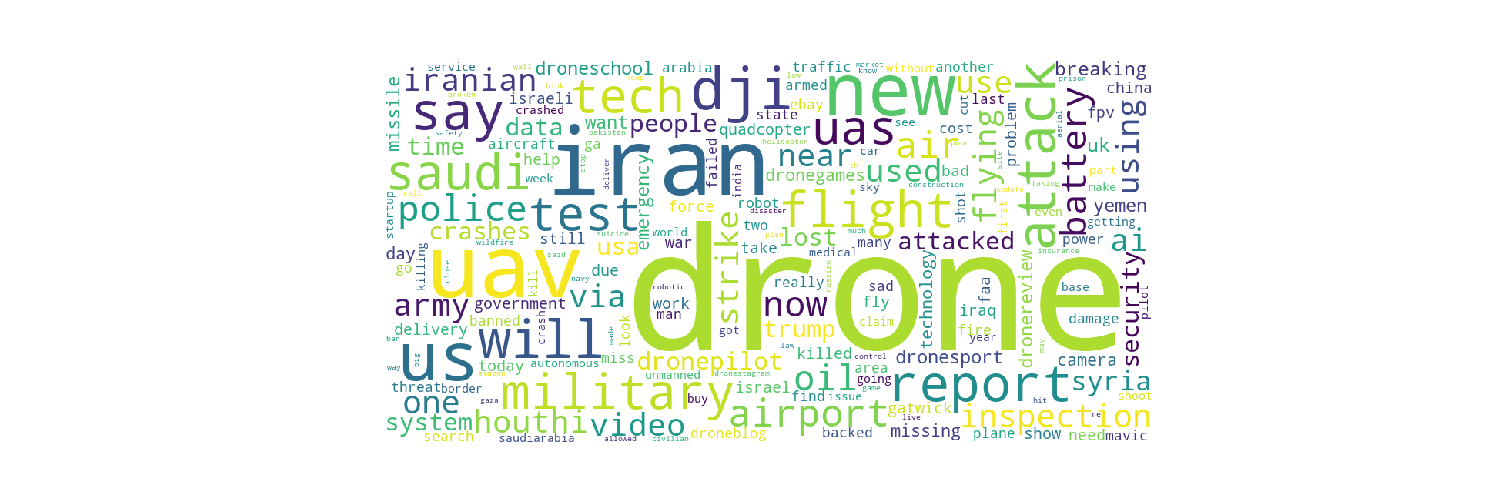

In [70]:
getWordCloud(tweets_final[tweets_final['class1_prob']<0.1]['text'])

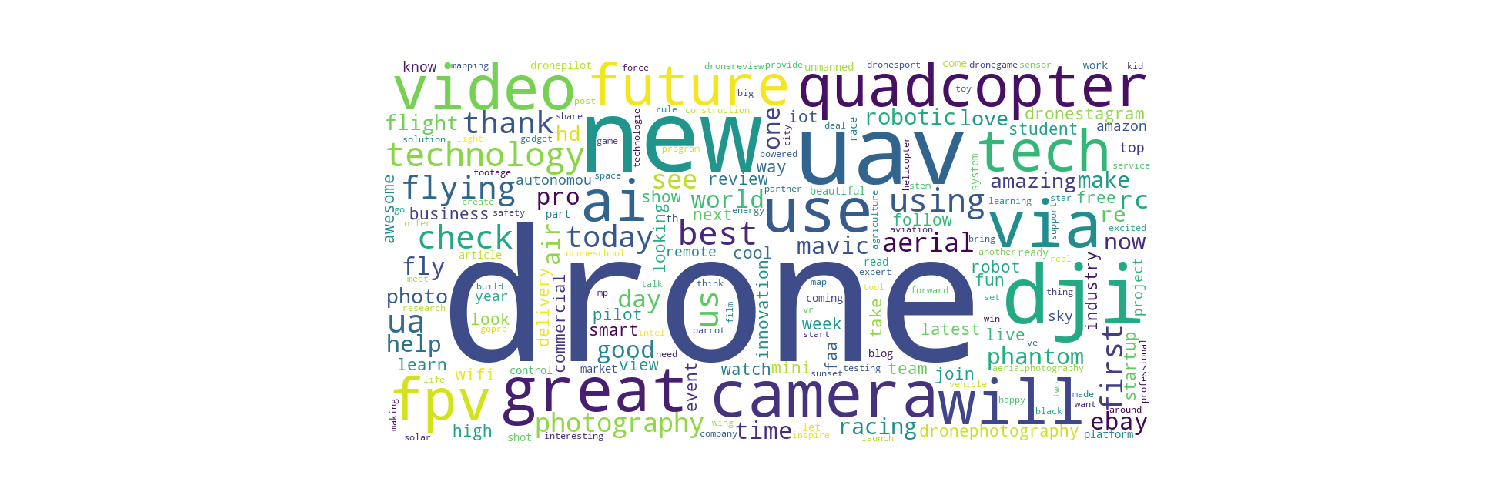

In [71]:
getWordCloud(tweets_final[tweets_final['class1_prob']>0.9]['text'])

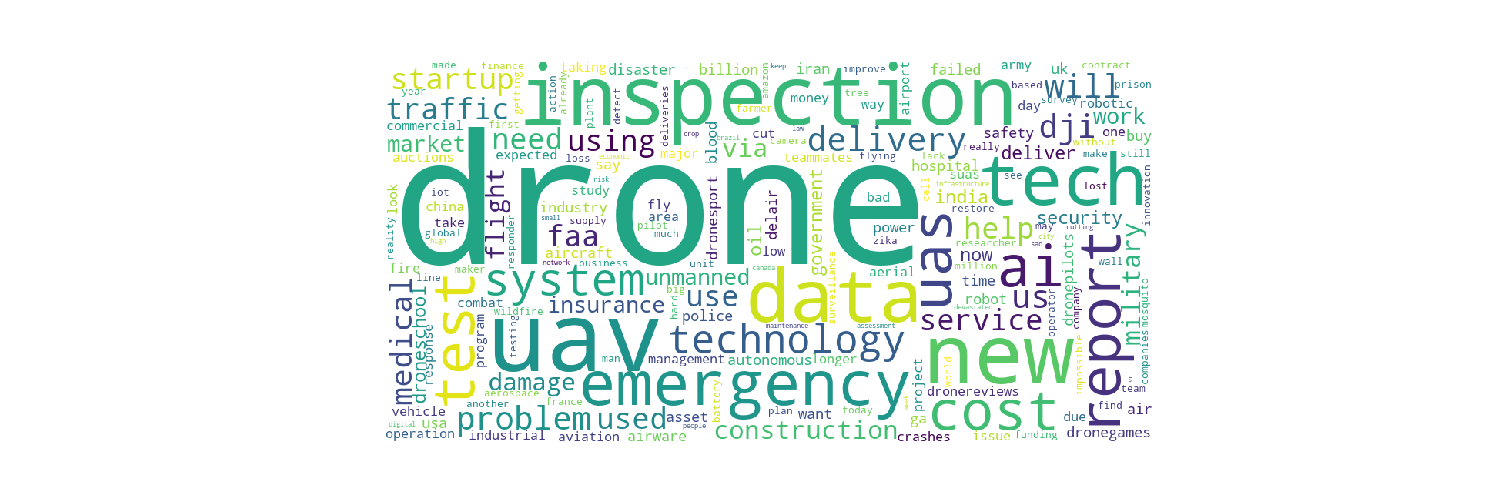

In [72]:
getWordCloud(tweets_final[(tweets_final['class1_prob']<0.1) & (tweets_final['topic'] == 0)]['text'])

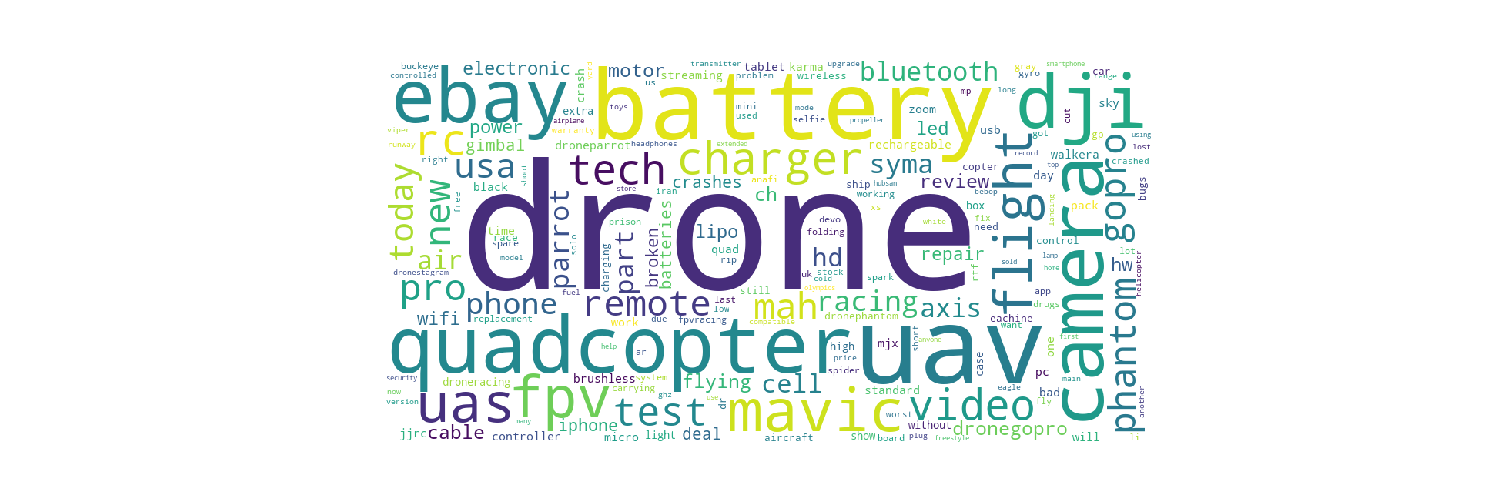

In [73]:
getWordCloud(tweets_final[(tweets_final['class1_prob']<0.1) & (tweets_final['topic'] == 1)]['text'])

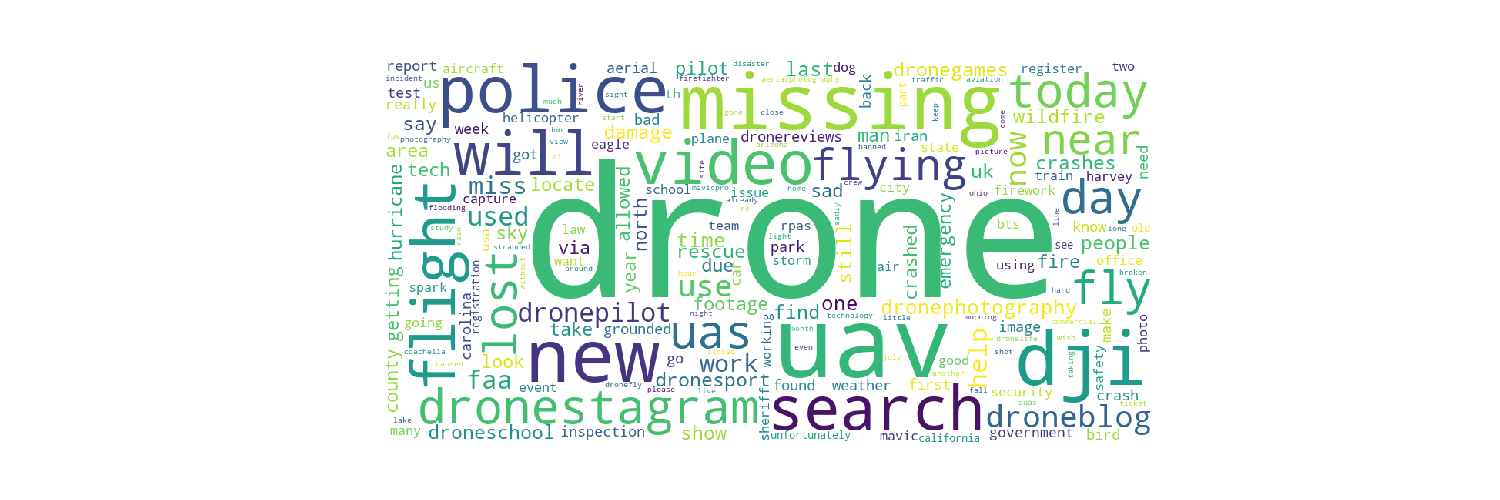

In [74]:
getWordCloud(tweets_final[(tweets_final['class1_prob']<0.1) & (tweets_final['topic'] == 2)]['text'])

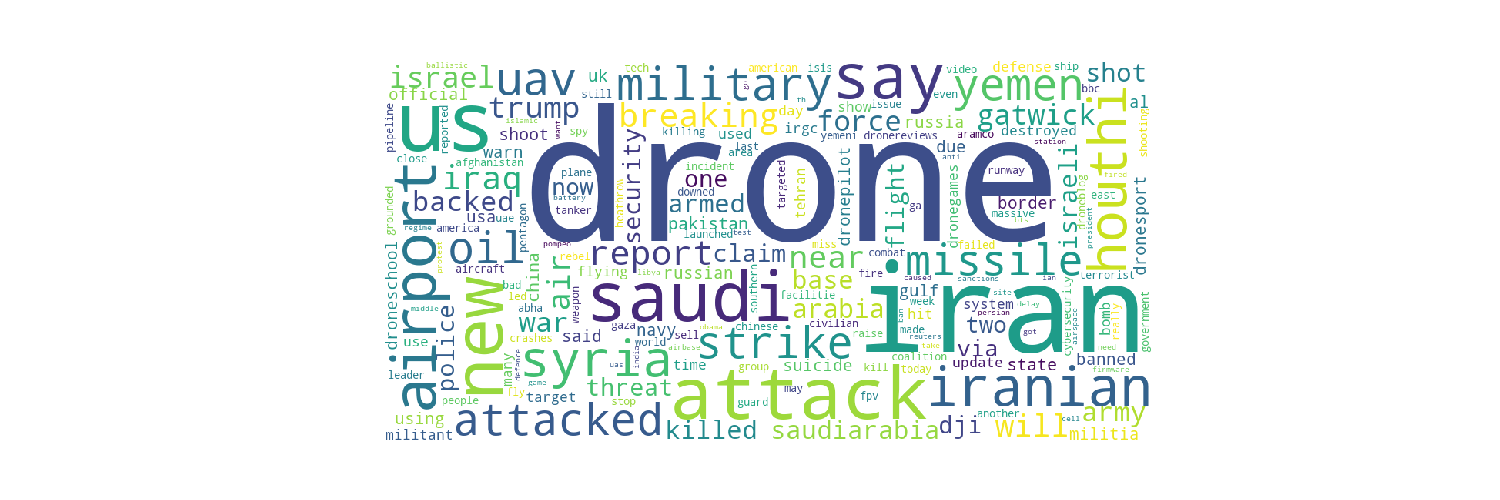

In [75]:
getWordCloud(tweets_final[(tweets_final['class1_prob']<0.1) & (tweets_final['topic'] == 3)]['text'])

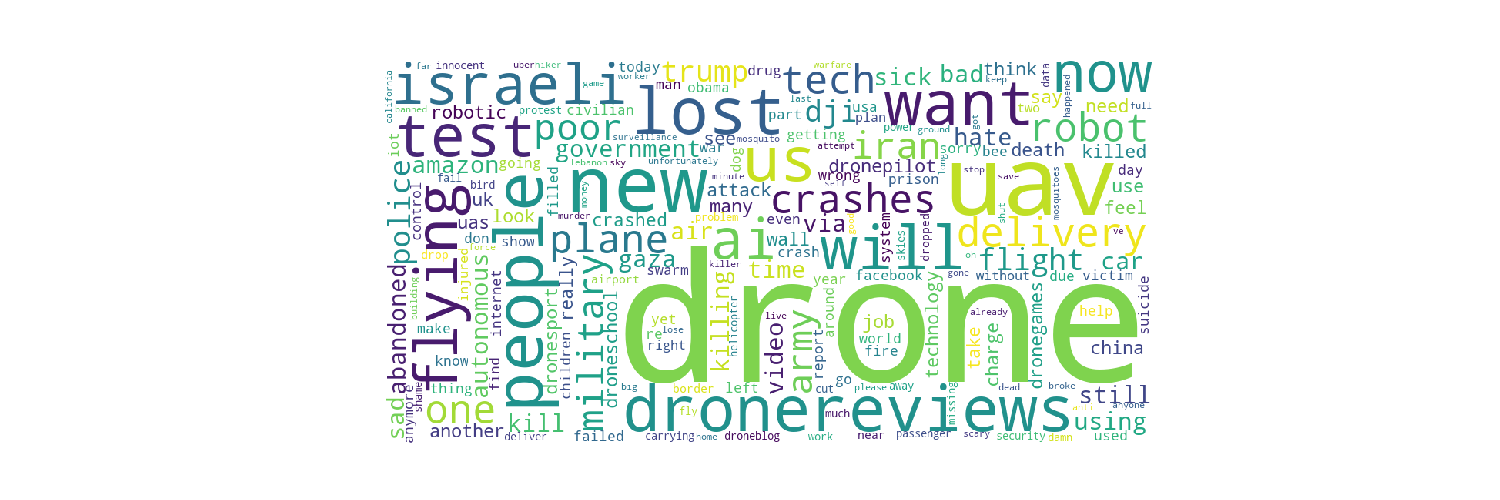

In [76]:
getWordCloud(tweets_final[(tweets_final['class1_prob']<0.1) & (tweets_final['topic'] == 4)]['text'])